# Setup

## OpenAI Key 등록
- [OpenAI Key 발급](https://platform.openai.com/api-keys)
- [OpenAI 요금](https://openai.com/api/pricing/)

In [ ]:
import os

os.environ['OPENAI_API_KEY'] = '생성한 키 입력'

## 구글 드라이브 연결

In [ ]:
# 구글 드라이브 연결(데이터 로드를 위해서)
try:
    from google.colab import drive

    drive.mount('/content/data')
    DATA_PATH = "/content/data/MyDrive/ai_lecture/3. Large Language Models/data/"
except:
    DATA_PATH = "./data/"

Mounted at /content/data


## install

In [ ]:
!pip install -U langchain langchain-community langchain-experimental langchain-core langchain-openai langsmith langchainhub pymupdf faiss-cpu pypdf unstructured chromadb pdfplumber

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 60.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 54.6 MB/s eta 0:00:00


# [RAG 의 기능별 다양한 모듈 활용기](https://wikidocs.net/234009)

## [단계 1: 문서 로드(Load Documents)](https://python.langchain.com/docs/how_to/#document-loaders)

### 웹페이지

In [ ]:
# 뉴스기사의 내용을 로드하고, 청크로 나누고, 인덱싱합니다.
loader = WebBaseLoader(
    web_paths=("https://www.bbc.com/news/business-68092814",),
    bs_kwargs=dict(
        parse_only=bs4.SoupStrainer(
            "main",
            attrs={"id": ["main-content"]},
        )
    ),
)
docs = loader.load()
print(f"문서의 수: {len(docs)}")
docs[0].page_content[:500]

문서의 수: 1


'Could AI \'trading bots\' transform the world of investing?Getty ImagesIt is hard for both humans and computers to predict stock market movementsSearch for "AI investing" online, and you\'ll be flooded with endless offers to let artificial intelligence manage your money.I recently spent half an hour finding out what so-called AI "trading bots" could apparently do with my investments.Many prominently suggest that they can give me lucrative returns. Yet as every reputable financial firm warns - your '

### PDF

In [ ]:
from langchain.document_loaders import PyPDFLoader

# PDF 파일 로드. 파일의 경로 입력
loader = PyPDFLoader(DATA_PATH+"SPRI_AI_Brief_2023년12월호_F.pdf")

# 페이지 별 문서 로드
docs = loader.load()
print(f"문서의 수: {len(docs)}")

# 10번째 페이지의 내용 출력
print(f"\n[페이지내용]\n{docs[10].page_content[:500]}")
print(f"\n[metadata]\n{docs[10].metadata}\n")


문서의 수: 23

[페이지내용]
SPRi AI Brief |  
2023-12 월호
8코히어 , 데이터 투명성 확보를 위한 데이터 출처 탐색기 공개
n코히어와 12개 기관이  광범위한 데이터셋에 대한 감사를 통해 원본 데이터 출처, 재라이선스 상태, 
작성자 등 다양한 정보를 제공하는 ‘데이터 출처 탐색기 ’ 플랫폼을 출시
n대화형 플랫폼을 통해 개발자는 데이터셋의 라이선스 상태를 쉽게 파악할 수 있으며 데이터셋의 
구성과 계보도 추적 가능KEY Contents
£데이터 출처 탐색기 , 광범위한 데이터셋 정보 제공을 통해 데이터 투명성 향상
nAI 기업 코히어 (Cohere) 가 매사추세츠 공과⼤(MIT), 하버드 ⼤ 로스쿨 , 카네기멜론 ⼤ 등 12개 기관과  
함께 2023 년 10월 25일 ‘데이터 출처 탐색기 (Data Provenance Explorer)’ 플랫폼을 공개
∙AI 모델 훈련에 사용되는 데이터셋의 불분명한 출처로 인해 데이터 투명성이 확보되지 않아 다양한 
법적·윤리적 문제가 발생
∙이에 연구

[metadata]
{'source': '/content/data/MyDrive/ai_lecture/3. Large Language Models/data/SPRI_AI_Brief_2023년12월호_F.pdf', 'page': 10}



### CSV

In [ ]:
from langchain_community.document_loaders.csv_loader import CSVLoader

# CSV 파일 로드
loader = CSVLoader(file_path=DATA_PATH+"titanic.csv")
docs = loader.load()
print(f"문서의 수: {len(docs)}")

# 10번째 페이지의 내용 출력
print(f"\n[페이지내용]\n{docs[10].page_content[:500]}")
print(f"\n[metadata]\n{docs[10].metadata}\n")


문서의 수: 20

[페이지내용]
PassengerId: 11
Survived: 1
Pclass: 3
Name: Sandstrom, Miss. Marguerite Rut
Sex: female
Age: 4
SibSp: 1
Parch: 1
Ticket: PP 9549
Fare: 16.7
Cabin: G6
Embarked: S

[metadata]
{'source': '/content/data/MyDrive/ai_lecture/3. Large Language Models/data/titanic.csv', 'row': 10}



### TXT 파일

In [ ]:
from langchain_community.document_loaders import TextLoader

loader = TextLoader(DATA_PATH+"appendix-keywords.txt")
docs = loader.load()
print(f"문서의 수: {len(docs)}")

# 10번째 페이지의 내용 출력
print(f"\n[페이지내용]\n{docs[0].page_content[:500]}")
print(f"\n[metadata]\n{docs[0].metadata}\n")


문서의 수: 1

[페이지내용]
Semantic Search

정의: 의미론적 검색은 사용자의 질의를 단순한 키워드 매칭을 넘어서 그 의미를 파악하여 관련된 결과를 반환하는 검색 방식입니다.
예시: 사용자가 "태양계 행성"이라고 검색하면, "목성", "화성" 등과 같이 관련된 행성에 대한 정보를 반환합니다.
연관키워드: 자연어 처리, 검색 알고리즘, 데이터 마이닝

Embedding

정의: 임베딩은 단어나 문장 같은 텍스트 데이터를 저차원의 연속적인 벡터로 변환하는 과정입니다. 이를 통해 컴퓨터가 텍스트를 이해하고 처리할 수 있게 합니다.
예시: "사과"라는 단어를 [0.65, -0.23, 0.17]과 같은 벡터로 표현합니다.
연관키워드: 자연어 처리, 벡터화, 딥러닝

Token

정의: 토큰은 텍스트를 더 작은 단위로 분할하는 것을 의미합니다. 이는 일반적으로 단어, 문장, 또는 구절일 수 있습니다.
예시: 문장 "나는 학교에 간다"를 "나는", "학교에", "간다"로 분할합니다.
연관키워드: 토큰화, 자연어

[metadata]
{'source': '/content/data/MyDrive/ai_lecture/3. Large Language Models/data/appendix-keywords.txt'}



### [폴더 내의 모든 파일 로드](https://python.langchain.com/v0.1/docs/modules/data_connection/document_loaders/file_directory/)

- txt

In [ ]:
from langchain_community.document_loaders import DirectoryLoader
from langchain_community.document_loaders import TextLoader

loader = DirectoryLoader(DATA_PATH, glob="**/*.txt", show_progress=True, loader_cls=TextLoader)
docs = loader.load()

print(f"문서의 수: {len(docs)}")

# 10번째 페이지의 내용 출력
print(f"\n[페이지내용]\n{docs[0].page_content[:500]}")
print(f"\n[metadata]\n{docs[0].metadata}\n")







  0%|          | 0/7 [00:00<?, ?it/s]




 86%|████████▌ | 6/7 [00:00<00:00,  7.17it/s]




100%|██████████| 7/7 [00:01<00:00,  4.86it/s]

문서의 수: 7

[페이지내용]
제목: 
AI2, 상업 활용까지 자유로운 '진짜' 오픈 소스 LLM '올모' 출시

내용:
앨런AI연구소(AI2)가 완전한 오픈 소스 대형언어모델(LLM) '올모(OLMo)’를 출시했다. 데이터 수집, 학습, 배포의 전 과정을 투명하게 공개한 데다 상업적 사용까지 허용한 진정한 의미의 오픈 소스 LLM이라는 평가다.
벤처비트는 1일(현지시간) 비영리 민간 AI 연구기관인 AI2가 ‘최초의 진정한 오픈 소스 LLM 및 프레임워크’라고 소개한 ‘올모’를 출시했다고 보도했다. 
이에 따르면 올모는 모델 코드와 모델 가중치뿐만 아니라 훈련 코드, 훈련 데이터, 관련 툴킷 및 평가 툴킷도 제공한다. 이를 통해 모델이 어떻게 구축되었는지 심층적으로 분석, LLM의 작동 방식과 응답을 생성하는 원리를 더 잘 이해할 수 있다. 
올모 프레임워크는 70억 매개변수의 ‘올모 7B’ 등 4가지 변형 모델과 10억 매개변수의 ‘올모 1B’ 모델을 제공한다. 모델들은 훈련 데이터를 생성하는 코드를 포함해 

[metadata]
{'source': '/content/data/MyDrive/ai_lecture/3. Large Language Models/data/news.txt'}



- pdf

In [ ]:
loader = DirectoryLoader(DATA_PATH, glob="**/*.pdf", show_progress=True, loader_cls=PyPDFLoader)
docs = loader.load()

print(f"문서의 수: {len(docs)}\n")
print("[메타데이터]\n")
print(docs[0].metadata)
print("\n========= [앞부분] 미리보기 =========\n")
print(docs[0].page_content[2500:3000])


100%|██████████| 3/3 [00:11<00:00,  3.96s/it]

문서의 수: 123

[메타데이터]

{'source': '/content/data/MyDrive/ai_lecture/3. Large Language Models/data/000660_SK_2023.pdf', 'page': 0}

========= [앞부분] 미리보기 =========




- Python

In [ ]:
from langchain_community.document_loaders import PythonLoader

loader = DirectoryLoader(DATA_PATH, glob="**/*.py", loader_cls=PythonLoader)
docs = loader.load()

print(f"문서의 수: {len(docs)}\n")
print("[메타데이터]\n")
print(docs[0].metadata)
print("\n========= [앞부분] 미리보기 =========\n")
print(docs[0].page_content[:500])


문서의 수: 1

[메타데이터]

{'source': '/content/data/MyDrive/ai_lecture/3. Large Language Models/data/audio_utils.py'}

========= [앞부분] 미리보기 =========

import re
import os
from pytube import YouTube
from moviepy.editor import AudioFileClip, VideoFileClip
from pydub import AudioSegment
from pydub.silence import detect_nonsilent


def extract_abr(abr):
    youtube_audio_pattern = re.compile(r"\d+")
    kbps = youtube_audio_pattern.search(abr)
    if kbps:
        kbps = kbps.group()
        return int(kbps)
    else:
        return 0


def get_audio_filepath(filename):
    # audio 폴더가 없으면 생성
    if not os.path.isdir("audio"):
        os.mkdir("au


## 단계 2: 문서 분할(Split Documents)

In [ ]:
# chain of density 논문의 일부 내용을 불러옵니다
text = ""
with open(DATA_PATH+"chain-of-density.txt", "r") as f:
    text = f.read()[:500]

text

'Selecting the “right” amount of information to include in a summary is a difficult task. \nA good summary should be detailed and entity-centric without being overly dense and hard to follow. To better understand this tradeoff, we solicit increasingly dense GPT-4 summaries with what we refer to as a “Chain of Density” (CoD) prompt. Specifically, GPT-4 generates an initial entity-sparse summary before iteratively incorporating missing salient entities without increasing the length. Summaries genera'

In [ ]:
# 뉴스기사의 내용을 로드하고, 청크로 나누고, 인덱싱합니다.
loader = WebBaseLoader(
    web_paths=("https://www.bbc.com/news/business-68092814",),
    bs_kwargs=dict(
        parse_only=bs4.SoupStrainer(
            "main",
            attrs={"id": ["main-content"]},
        )
    ),
)
docs = loader.load()
print(f"문서의 수: {len(docs)}")
docs[0].page_content[:500]

문서의 수: 1


'Could AI \'trading bots\' transform the world of investing?Getty ImagesIt is hard for both humans and computers to predict stock market movementsSearch for "AI investing" online, and you\'ll be flooded with endless offers to let artificial intelligence manage your money.I recently spent half an hour finding out what so-called AI "trading bots" could apparently do with my investments.Many prominently suggest that they can give me lucrative returns. Yet as every reputable financial firm warns - your '

### CharacterTextSplitter

- 시각화 예제: https://chunkviz.up.railway.app/

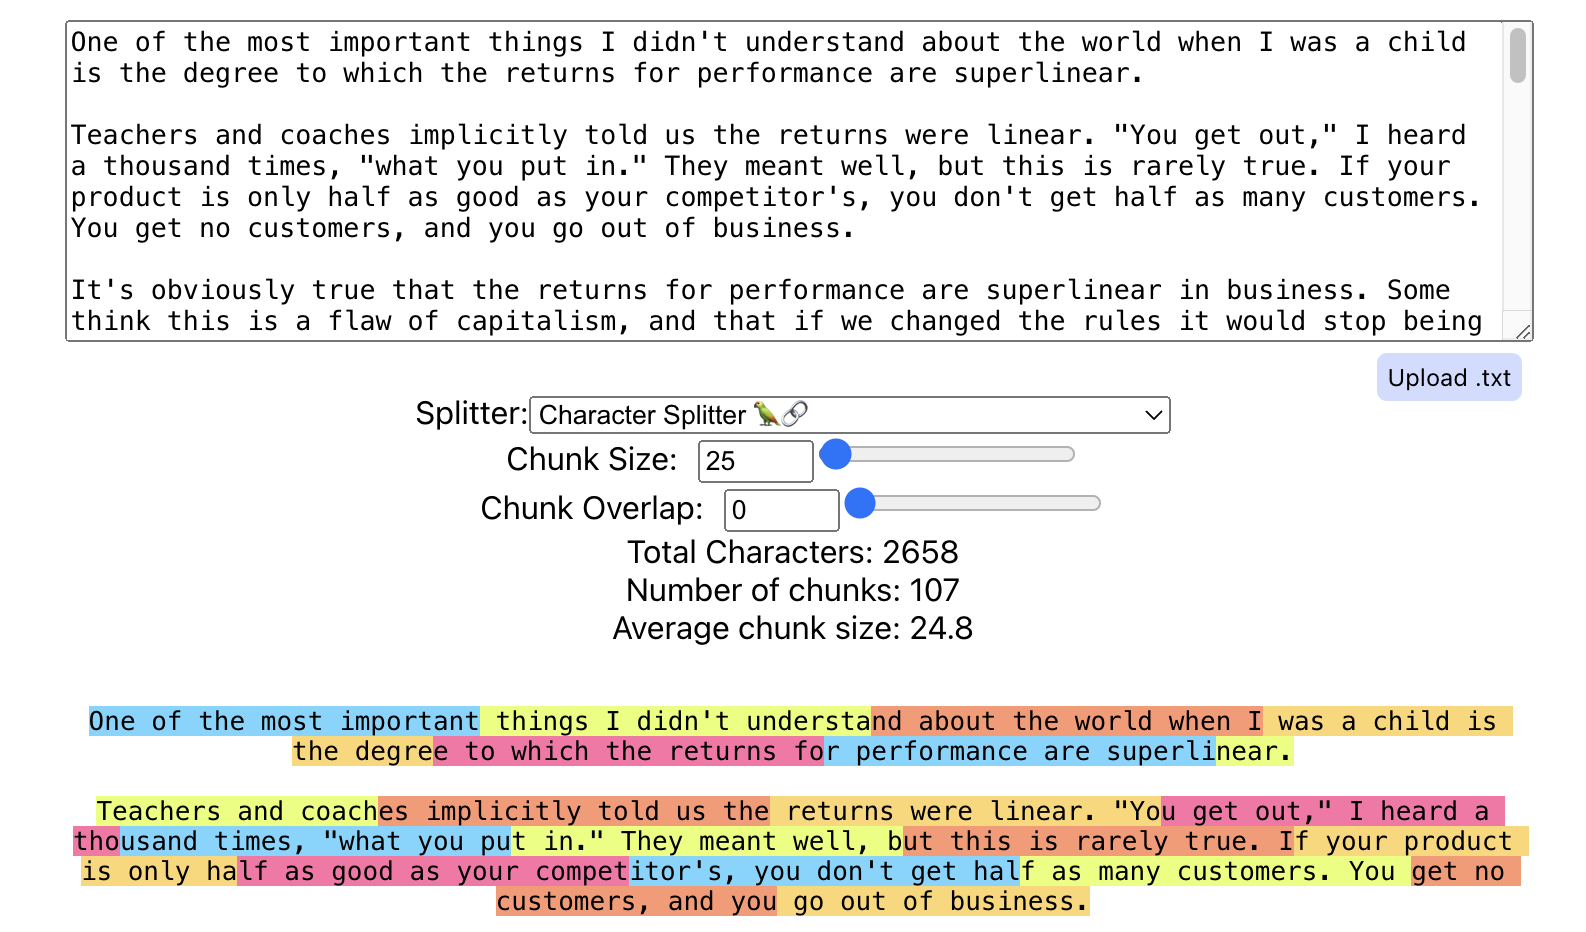

- 이것은 가장 간단한 방법입니다. 이 방법은 문자를 기준으로 분할합니다(기본값은 "\n\n") 그리고 청크의 길이를 문자의 수로 측정합니다.
  1. 텍스트가 어떻게 분할되는지: 단일 문자 단위
  2. 청크 크기가 어떻게 측정되는지: len of characters.
- `CharacterTextSplitter` 클래스는 텍스트를 특정 크기의 청크로 분할하는 기능을 제공합니다.
  - `separator` 매개변수는 청크를 구분하는 데 사용되는 문자열을 지정하며, 여기서는 두 개의 개행 문자("\n\n")를 사용합니다
  - `chunk_size`는 각 청크의 최대 길이를 결정합니다
  - `chunk_overlap`은 인접한 청크 간에 겹치는 문자의 수를 지정합니다.
  - `length_function`은 청크의 길이를 계산하는 데 사용되는 함수를 결정하며, 기본적으로 문자열의 길이를 반환하는 len 함수가 사용됩니다.
  - `is_separator_regex`는 separator가 정규 표현식으로 해석될지 여부를 결정하는 불리언 값입니다.

In [ ]:
from langchain.text_splitter import CharacterTextSplitter

text_splitter = CharacterTextSplitter(
    separator=" ",
    chunk_size=1000,
    chunk_overlap=100
)


- 이 함수는 text_splitter 객체의 create_documents 메소드를 사용하여 주어진 텍스트(state_of_the_union)를 여러 문서로 분할하고, 그 결과를 texts 변수에 저장합니다.
- 이후 texts의 첫 번째 문서를 출력합니다. 이 과정은 텍스트 데이터를 처리하고 분석하기 위한 초기 단계로 볼 수 있으며, 특히 큰 텍스트 데이터를 관리 가능한 크기의 단위로 나누는 데 유용합니다.

In [ ]:
# document를 청크로 나누어줍니다.
split_docs = text_splitter.split_documents(docs)
len(split_docs)

8

In [ ]:
split_docs[0]

Document(metadata={'source': 'https://www.bbc.com/news/business-68092814'}, page_content='Could AI \'trading bots\' transform the world of investing?Getty ImagesIt is hard for both humans and computers to predict stock market movementsSearch for "AI investing" online, and you\'ll be flooded with endless offers to let artificial intelligence manage your money.I recently spent half an hour finding out what so-called AI "trading bots" could apparently do with my investments.Many prominently suggest that they can give me lucrative returns. Yet as every reputable financial firm warns - your capital may be at risk.Or putting it more simply - you could lose your money - whether it is a human or a computer that is making stock market decisions on your behalf.Yet such has been the hype about the ability of AI over the past few years, that almost one in three investors would be happy to let a trading bot make all the decisions for them, according to one 2023 survey in the US.John Allan says inve

In [ ]:
text_splitter = CharacterTextSplitter(chunk_size=100, chunk_overlap=10, separator="\n")
text_splitter.split_text(text)

['Selecting the “right” amount of information to include in a summary is a difficult task.',
 'A good summary should be detailed and entity-centric without being overly dense and hard to follow. To better understand this tradeoff, we solicit increasingly dense GPT-4 summaries with what we refer to as a “Chain of Density” (CoD) prompt. Specifically, GPT-4 generates an initial entity-sparse summary before iteratively incorporating missing salient entities without increasing the length. Summaries genera']

In [ ]:
text_splitter = CharacterTextSplitter(chunk_size=100, chunk_overlap=10, separator=" ")
text_splitter.split_text(text)

['Selecting the “right” amount of information to include in a summary is a difficult task. \nA good',
 'A good summary should be detailed and entity-centric without being overly dense and hard to follow.',
 'to follow. To better understand this tradeoff, we solicit increasingly dense GPT-4 summaries with',
 'with what we refer to as a “Chain of Density” (CoD) prompt. Specifically, GPT-4 generates an initial',
 'an initial entity-sparse summary before iteratively incorporating missing salient entities without',
 'without increasing the length. Summaries genera']

### RecursiveTextSplitter

- 이 텍스트 분할기는 일반 텍스트에 권장되는 텍스트 분할기입니다.
  1. 텍스트가 어떻게 분할 규칙: list of separators
  2. 청크 크기가 어떻게 측정되는가: len of characters
- RecursiveCharacterTextSplitter 클래스는 텍스트를 재귀적으로 분할하는 기능을 제공합니다.
- 이 클래스는 chunk_size로 분할할 청크의 크기, chunk_overlap으로 인접 청크 간의 겹침 크기, length_function으로 청크의 길이를 계산하는 함수, 그리고 is_separator_regex로 구분자가 정규 표현식인지 여부를 지정하는 매개변수를 받습니다.
- 예시에서는 청크 크기를 100, 겹침 크기를 20으로 설정하고, 길이 계산 함수로 len을 사용하며, 구분자가 정규 표현식이 아님을 나타내기 위해 is_separator_regex를 False로 설정합니다.

In [ ]:
# langchain 패키지에서 RecursiveCharacterTextSplitter 클래스를 가져옵니다.
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [ ]:
character_text_splitter = CharacterTextSplitter(
    chunk_size=100, chunk_overlap=10, separator=" "
)
for sent in character_text_splitter.split_text(text):
    print(sent)

print("===" * 20)

recursive_text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=100, chunk_overlap=10
)
for sent in recursive_text_splitter.split_text(text):
    print(sent)

Selecting the “right” amount of information to include in a summary is a difficult task. 
A good
A good summary should be detailed and entity-centric without being overly dense and hard to follow.
to follow. To better understand this tradeoff, we solicit increasingly dense GPT-4 summaries with
with what we refer to as a “Chain of Density” (CoD) prompt. Specifically, GPT-4 generates an initial
an initial entity-sparse summary before iteratively incorporating missing salient entities without
without increasing the length. Summaries genera
Selecting the “right” amount of information to include in a summary is a difficult task.
A good summary should be detailed and entity-centric without being overly dense and hard to follow.
follow. To better understand this tradeoff, we solicit increasingly dense GPT-4 summaries with what
with what we refer to as a “Chain of Density” (CoD) prompt. Specifically, GPT-4 generates an
an initial entity-sparse summary before iteratively incorporating missing s

- 지정한 separators 리스트를 순차적으로 시도하며 주어진 문서를 분할합니다.
- 청크가 충분히 작아질 때까지 순서대로 분할을 시도합니다. 기본 목록은 `["\n\n", "\n", " ", ""]`입니다.
- 이는 일반적으로 의미적으로 가장 연관성이 강한 텍스트 조각인 것처럼 보이는 모든 단락(그리고 문장, 단어)을 가능한 한 길게 유지하려는 효과가 있습니다.

In [ ]:
# recursive_text_splitter 에 기본 지정된 separators 를 확인합니다.
recursive_text_splitter._separators

['\n\n', '\n', ' ', '']

### Semantic Similarity
- 의미적 유사성을 기준으로 텍스트를 분할합니다.
- 높은 수준(high level)에서 문장으로 분할한 다음 3개 문장으로 그룹화한 다음 임베딩 공간에서 유사한 문장을 병합하는 방식입니다.

In [ ]:
from langchain_experimental.text_splitter import SemanticChunker
from langchain_openai.embeddings import OpenAIEmbeddings

# SemanticChunker 를 생성합니다.
semantic_text_splitter = SemanticChunker(
    OpenAIEmbeddings(), add_start_index=True)

In [ ]:
for sent in semantic_text_splitter.split_text(text):
    print(sent)
    print("===" * 20)

Selecting the “right” amount of information to include in a summary is a difficult task. A good summary should be detailed and entity-centric without being overly dense and hard to follow. To better understand this tradeoff, we solicit increasingly dense GPT-4 summaries with what we refer to as a “Chain of Density” (CoD) prompt. Specifically, GPT-4 generates an initial entity-sparse summary before iteratively incorporating missing salient entities without increasing the length.
Summaries genera


## 3 단계: 임베딩

In [ ]:
import bs4
from langchain_community.document_loaders import WebBaseLoader
from langchain_text_splitters import RecursiveCharacterTextSplitter

# 뉴스기사 내용을 로드하고, 청크로 나누고, 인덱싱합니다.
url = "https://n.news.naver.com/article/437/0000378416"
loader = WebBaseLoader(
    web_paths=(url,),
    bs_kwargs=dict(
        parse_only=bs4.SoupStrainer(
            "div",
            attrs={"class": ["newsct_article _article_body", "media_end_head_title"]},
        )
    ),
)
docs = loader.load()


# 단계 2: 문서 분할(Split Documents)
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=50)

splits = text_splitter.split_documents(docs)

### 유료 과금 임베딩(OpenAI)
- 다음은 OpenAI 의 지원되는 Embedding 모델들의 목록입니다.
- 기본 값은 `text-embeding-ada-002` 입니다.

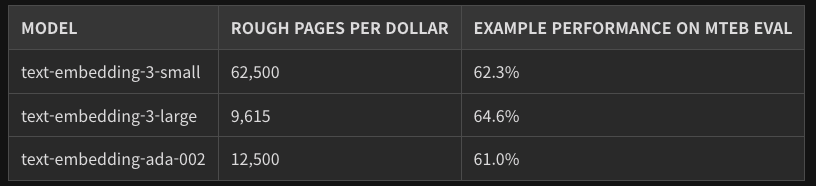

In [ ]:
from langchain_community.vectorstores import FAISS
from langchain_openai.embeddings import OpenAIEmbeddings

# 단계 3: 임베딩 & 벡터스토어 생성(Create Vectorstore)
# 벡터스토어를 생성합니다.
vectorstore = FAISS.from_documents(
    documents=splits, embedding=OpenAIEmbeddings())

In [ ]:
vectorstore = FAISS.from_documents(
    documents=splits, embedding=OpenAIEmbeddings(model="text-embedding-3-small")
)

### [무료 Open Source 기반 임베딩](https://python.langchain.com/api_reference/community/embeddings/langchain_community.embeddings.huggingface.HuggingFaceBgeEmbeddings.html)

In [ ]:
!pip install sentence_transformers

  Using cached sentence_transformers-3.1.0-py3-none-any.whl.metadata (23 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.1/249.1 kB 5.1 MB/s eta 0:00:00


In [ ]:
from langchain_community.embeddings import HuggingFaceBgeEmbeddings
from langchain_community.vectorstores import FAISS

model_name = "BAAI/bge-large-en-v1.5"
model_kwargs = {'device': 'cpu'}
encode_kwargs = {'normalize_embeddings': True}
hf = HuggingFaceBgeEmbeddings(
    model_name=model_name,
    model_kwargs=model_kwargs,
    encode_kwargs=encode_kwargs
)
vectorstore = FAISS.from_documents(
    documents=splits, embedding=hf
)

## 4단계: 벡터스토어 생성(Create Vectorstore)

### FAISS

In [ ]:
from langchain_community.vectorstores import FAISS
from langchain_openai.embeddings import OpenAIEmbeddings

# FAISS DB 적용
vectorstore = FAISS.from_documents(
    documents=splits, embedding=OpenAIEmbeddings())

### Chroma

In [ ]:
from langchain_community.vectorstores import Chroma

# Chroma DB 적용
vectorstore = Chroma.from_documents(documents=splits, embedding=OpenAIEmbeddings())

## [5단계: Retriever 생성](https://python.langchain.com/docs/how_to/#retrievers)
- 리트리버는 구조화되지 않은 쿼리가 주어지면 문서를 반환하는 인터페이스입니다.
- 리트리버는 문서를 저장할 필요 없이 문서를 반환(또는 검색)하기만 합니다.

### 유사도 기반 검색

In [ ]:
query = "회사의 저출생 정책이 뭐야?"

retriever = vectorstore.as_retriever(search_type="similarity")
search_result = retriever.get_relevant_documents(query)
print(search_result)

<ipython-input-23-f1e60a70053f>:4: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 1.0. Use invoke instead.
  search_result = retriever.get_relevant_documents(query)


[Document(metadata={'source': 'https://n.news.naver.com/article/437/0000378416'}, page_content="출산 직원에게 '1억원' 쏜다…회사의 파격적 저출생 정책"), Document(metadata={'source': 'https://n.news.naver.com/article/437/0000378416'}, page_content='남성 직원의 육아휴직을 의무화한 곳도 있습니다.사내 어린이집을 밤 10시까지 운영하고 셋째를 낳으면 무조건 승진시켜 주기도 합니다.한 회사는 지난해 네쌍둥이를 낳은 직원에 의료비를 지원해 관심을 모았습니다.정부 대신 회사가 나서는 출산장려책이 사회적 분위기를 바꿀 거라는 기대가 커지는 가운데, 여력이 부족한 중소지원이 필요하다는 목소리도 나옵니다.[영상디자인 곽세미]'), Document(metadata={'source': 'https://n.news.naver.com/article/437/0000378416'}, page_content="[앵커]올해 아이 낳을 계획이 있는 가족이라면 솔깃할 소식입니다. 정부가 저출생 대책으로 매달 주는 부모 급여, 0세 아이는 100만원으로 올렸습니다. 여기에 첫만남이용권, 아동수당까지 더하면 아이 돌까지 1년 동안 1520만원을 받습니다. 지자체도 경쟁하듯 지원에 나섰습니다. 인천시는 새로 태어난 아기, 18살될 때까지 1억원을 주겠다. 광주시도 17살될 때까지 7400만원 주겠다고 했습니다. 선거 때면 나타나서 아이 낳으면 현금 주겠다고 밝힌 사람이 있었죠. 과거에는 표만 노린 '황당 공약'이라는 비판이 따라다녔습니다. 그런데 지금은 출산율이 이보다 더 나쁠 수 없다보니, 이런 현금성 지원을 진지하게 정책화 하는 상황까지 온 겁니다. 게다가 기업들도 뛰어들고 있습니다. 이번에는 출산한 직원에게 단번에 1억원을 주겠다는 회사까지 나타났습니다.이상화 기자가 취재했습니다.[기자]한 그룹사가 오늘 파격적인 저출생 정책을 내놨습니다.

- similarity_score_threshold 는 유사도 기반 검색에서 score_threshold 이상인 결과만 반환합니다.

In [ ]:
query = "회사의 저출생 정책이 뭐야?"

retriever = vectorstore.as_retriever(
    search_type="similarity_score_threshold", search_kwargs={"score_threshold": 0.8}
)
search_result = retriever.get_relevant_documents(query)
print(search_result)

[Document(metadata={'source': 'https://n.news.naver.com/article/437/0000378416'}, page_content="출산 직원에게 '1억원' 쏜다…회사의 파격적 저출생 정책")]


- maximum marginal search result 를 사용하여 검색합니다.

In [ ]:
query = "회사의 저출생 정책이 뭐야?"

retriever = vectorstore.as_retriever(search_type="mmr", search_kwargs={"k": 2})
search_result = retriever.get_relevant_documents(query)
print(search_result)

[Document(metadata={'source': 'https://n.news.naver.com/article/437/0000378416'}, page_content="출산 직원에게 '1억원' 쏜다…회사의 파격적 저출생 정책"), Document(metadata={'source': 'https://n.news.naver.com/article/437/0000378416'}, page_content='남성 직원의 육아휴직을 의무화한 곳도 있습니다.사내 어린이집을 밤 10시까지 운영하고 셋째를 낳으면 무조건 승진시켜 주기도 합니다.한 회사는 지난해 네쌍둥이를 낳은 직원에 의료비를 지원해 관심을 모았습니다.정부 대신 회사가 나서는 출산장려책이 사회적 분위기를 바꿀 거라는 기대가 커지는 가운데, 여력이 부족한 중소지원이 필요하다는 목소리도 나옵니다.[영상디자인 곽세미]')]


### 다양한 쿼리 생성

In [ ]:
from langchain.retrievers.multi_query import MultiQueryRetriever
from langchain_openai import ChatOpenAI

question = "회사의 저출생 정책이 뭐야?"

llm = ChatOpenAI(temperature=0, model="gpt-3.5-turbo")

retriever_from_llm = MultiQueryRetriever.from_llm(
    retriever=vectorstore.as_retriever(), llm=llm
)

In [ ]:
# Set logging for the queries
import logging

logging.basicConfig()
logging.getLogger("langchain.retrievers.multi_query").setLevel(logging.INFO)

In [ ]:
unique_docs = retriever_from_llm.get_relevant_documents(query=question)
len(unique_docs)


INFO:langchain.retrievers.multi_query:Generated queries: ['1. 회사의 출산율 저하 정책은 무엇인가요?', '2. 회사가 채택한 출산율 감소 정책은 어떤 것인가요?', '3. 회사의 출산율 저하 대책은 어떻게 되나요?']


3

### Ensemble Retriever

In [ ]:
!pip install rank_bm25

In [ ]:
from langchain.retrievers import BM25Retriever, EnsembleRetriever
from langchain_community.vectorstores import FAISS
from langchain_openai import OpenAIEmbeddings

In [ ]:
doc_list = [
    "난 오늘 많이 먹어서 배가 정말 부르다",
    "떠나는 저 배가 오늘 마지막 배인가요?",
    "내가 제일 좋아하는 과일들은 배, 사과, 키워, 수박 입니다.",
]

# initialize the bm25 retriever and faiss retriever
bm25_retriever = BM25Retriever.from_texts(doc_list)
bm25_retriever.k = 2

faiss_vectorstore = FAISS.from_texts(doc_list, OpenAIEmbeddings())
faiss_retriever = faiss_vectorstore.as_retriever(search_kwargs={"k": 2})

# initialize the ensemble retriever
ensemble_retriever = EnsembleRetriever(
    retrievers=[bm25_retriever, faiss_retriever], weights=[0.5, 0.5]
)

In [ ]:
def pretty_print(docs):
    for i, doc in enumerate(docs):
        print(f"[{i+1}] {doc.page_content}")

In [ ]:
sample_query = "나 요즘 배에 정말 살이 많이 쪘어..."
print(f"[Query]\n{sample_query}\n")
relevant_docs = bm25_retriever.get_relevant_documents(sample_query)
print("[BM25 Retriever]")
pretty_print(relevant_docs)
print("===" * 20)
relevant_docs = faiss_retriever.get_relevant_documents(sample_query)
print("[FAISS Retriever]")
pretty_print(relevant_docs)
print("===" * 20)
relevant_docs = ensemble_retriever.get_relevant_documents(sample_query)
print("[Ensemble Retriever]")
pretty_print(relevant_docs)

[Query]
나 요즘 배에 정말 살이 많이 쪘어...

[BM25 Retriever]
[1] 난 오늘 많이 먹어서 배가 정말 부르다
[2] 내가 제일 좋아하는 과일들은 배, 사과, 키워, 수박 입니다.
[FAISS Retriever]
[1] 난 오늘 많이 먹어서 배가 정말 부르다
[2] 떠나는 저 배가 오늘 마지막 배인가요?
[Ensemble Retriever]
[1] 난 오늘 많이 먹어서 배가 정말 부르다
[2] 내가 제일 좋아하는 과일들은 배, 사과, 키워, 수박 입니다.
[3] 떠나는 저 배가 오늘 마지막 배인가요?


## 6단계: 프롬프트 생성(Create Prompt)

- 프롬프트 엔지니어링은 주어진 데이터(context)를 토대로 우리가 원하는 결과를 도출할 때 중요한 역할을 합니다.

[TIP1]
- 만약, retriever 에서 도출한 결과에서 중요한 정보가 누락된다면 retriever 의 로직을 수정해야 합니다.
- 만약, retriever 에서 도출한 결과가 많은 정보를 포함하고 있지만, llm 이 그 중에서 중요한 정보를 찾지 못한거나 원하는 형태로 출력하지 않는다면 프롬프트를 수정해야 합니다.

[TIP2]
- LangSmith 의 hub 에는 검증된 프롬프트가 많이 업로드 되어 있습니다.
- 검증된 프롬프트를 활용하거나 약간 수정한다면 비용과 시간을 절약할 수 있습니다.
- https://smith.langchain.com/hub/search?q=rag

In [ ]:
from langchain import hub

In [ ]:
prompt = hub.pull("rlm/rag-prompt")
prompt

/usr/local/lib/python3.10/dist-packages/langsmith/client.py:322: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/langsmith/client.py:5301: LangChainBetaWarning: The function `loads` is in beta. It is actively being worked on, so the API may change.
  prompt = loads(json.dumps(prompt_object.manifest))


ChatPromptTemplate(input_variables=['context', 'question'], input_types={}, partial_variables={}, metadata={'lc_hub_owner': 'rlm', 'lc_hub_repo': 'rag-prompt', 'lc_hub_commit_hash': '50442af133e61576e74536c6556cefe1fac147cad032f4377b60c436e6cdcb6e'}, messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context', 'question'], input_types={}, partial_variables={}, template="You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.\nQuestion: {question} \nContext: {context} \nAnswer:"), additional_kwargs={})])

## 7단계: 언어모델 생성(Create LLM)

In [ ]:
from langchain_openai import ChatOpenAI

model = ChatOpenAI(temperature=0, model="gpt-3.5-turbo")

- 다음의 방식으로 토큰 사용량을 확인할 수 있습니다.

In [ ]:
from langchain.callbacks import get_openai_callback

with get_openai_callback() as cb:
    result = model.invoke("대한민국의 수도는 어디인가요?")
print(cb)

Tokens Used: 39
	Prompt Tokens: 24
	Completion Tokens: 15
Successful Requests: 1
Total Cost (USD): $3.45e-05


# [PDF 문서 기반 QA(Question-Answer)](https://wikidocs.net/251190)

In [ ]:
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import PyMuPDFLoader
from langchain_community.vectorstores import FAISS
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough
from langchain_core.prompts import PromptTemplate
from langchain_openai import ChatOpenAI, OpenAIEmbeddings

## 1. 사전작업(Pre-processing) - 1~4 단계

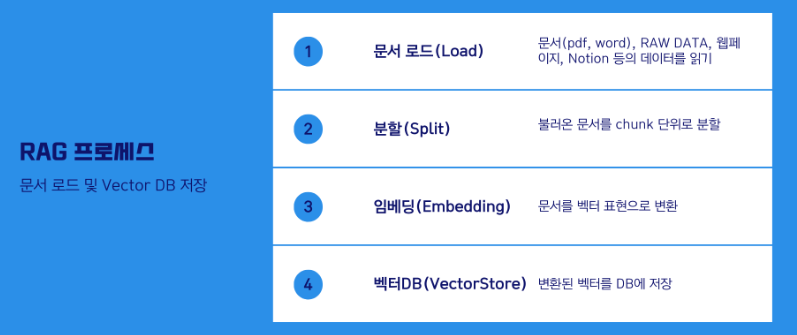

### 단계 1: 문서 로드(Load Documents)
- 문서 내용을 불러옵니다.

In [ ]:
loader = PyMuPDFLoader(DATA_PATH+"SPRI_AI_Brief_2023년12월호_F.pdf")
docs = loader.load()
print(f"문서의 페이지수: {len(docs)}")

문서의 페이지수: 23


### 단계 2: 문서 분할(Split Documents)
- 문서를 특정 기준(Chunk) 으로 분할합니다.

In [ ]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=50)
split_documents = text_splitter.split_documents(docs)
print(f"분할된 청크의수: {len(split_documents)}")

분할된 청크의수: 43


### 단계 3: 임베딩(Embedding) 생성
- 분할된(Chunk) 를 임베딩하여 저장합니다.

In [ ]:
embeddings = OpenAIEmbeddings()

### 단계 4: DB 생성(Create DB) 및 저장
- 임베딩된 Chunk 를 DB에 저장합니다.

In [ ]:
# 벡터스토어를 생성합니다.
vectorstore = FAISS.from_documents(documents=split_documents, embedding=embeddings)

## 2. RAG 수행(RunTime) - 5~8 단계


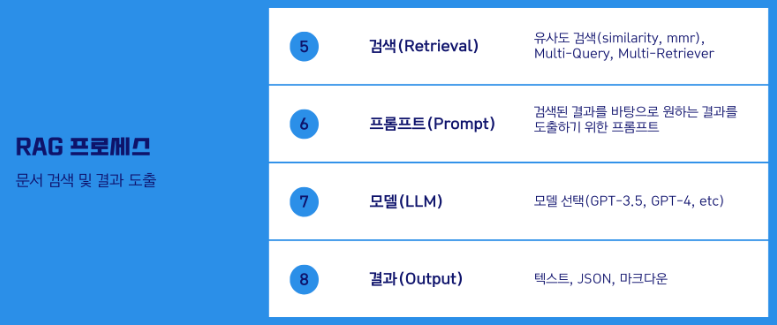

### 단계 5: 검색기(Retriever) 생성
- 쿼리(Query) 를 바탕으로 DB에서 검색하여 결과를 가져오기 위하여 리트리버를 정의합니다. 리트리버는 검색 알고리즘이며(Dense, Sparse) 리트리버로 나뉘게 됩니다. Dense: 유사도 기반 검색, Sparse: 키워드 기반 검색

In [ ]:
# 문서에 포함되어 있는 정보를 검색하고 생성합니다.
retriever = vectorstore.as_retriever()

In [ ]:
# 검색기에 쿼리를 날려 검색된 chunk 결과를 확인합니다.
retriever.invoke("삼성전자가 자체 개발한 AI 의 이름은?")

[Document(metadata={'source': '/content/data/MyDrive/ai_lecture/3. Large Language Models/data/SPRI_AI_Brief_2023년12월호_F.pdf', 'file_path': '/content/data/MyDrive/ai_lecture/3. Large Language Models/data/SPRI_AI_Brief_2023년12월호_F.pdf', 'page': 12, 'total_pages': 23, 'format': 'PDF 1.4', 'title': '', 'author': 'dj', 'subject': '', 'keywords': '', 'creator': 'Hwp 2018 10.0.0.13462', 'producer': 'Hancom PDF 1.3.0.542', 'creationDate': "D:20231208132838+09'00'", 'modDate': "D:20231208132838+09'00'", 'trapped': ''}, page_content='SPRi AI Brief |  \n2023-12월호\n10\n삼성전자, 자체 개발 생성 AI ‘삼성 가우스’ 공개\nn 삼성전자가 온디바이스에서 작동 가능하며 언어, 코드, 이미지의 3개 모델로 구성된 자체 개발 생성 \nAI 모델 ‘삼성 가우스’를 공개\nn 삼성전자는 삼성 가우스를 다양한 제품에 단계적으로 탑재할 계획으로, 온디바이스 작동이 가능한 \n삼성 가우스는 외부로 사용자 정보가 유출될 위험이 없다는 장점을 보유\nKEY Contents\n£ 언어, 코드, 이미지의 3개 모델로 구성된 삼성 가우스, 온디바이스 작동 지원\nn 삼성전자가 2023년 11월 8일 열린 ‘삼성 AI 포럼 2023’ 행사에서 자체 개발한 생성 AI 모델 \n‘삼성 가우스’를 최초 공개\n∙정규분포 이론을 정립한 천재 수학자 가우스(Gauss)의 이름을 본뜬 삼성 가우스는 다양한 상황에 \n최적화된 크기의 모델 선택이 가능\n∙삼성 가우스는 라이

### 단계 6: 프롬프트 생성(Create Prompt)
- RAG 를 수행하기 위한 프롬프트를 생성합니다. 프롬프트의 context 에는 문서에서 검색된 내용이 입력됩니다. 프롬프트 엔지니어링을 통하여 답변의 형식을 지정할 수 있습니다.

In [ ]:
# 프롬프트를 생성합니다.
prompt = PromptTemplate.from_template(
    """You are an assistant for question-answering tasks.
Use the following pieces of retrieved context to answer the question.
If you don't know the answer, just say that you don't know.
Answer in Korean.

#Question:
{question}
#Context:
{context}

#Answer:"""
)

### 단계 7: 언어모델(LLM) 생성
- 모델을 정의합니다.(GPT-3.5, GPT-4, Claude, etc..)

In [ ]:
# 모델(LLM) 을 생성합니다.
llm = ChatOpenAI(model_name="gpt-4o", temperature=0)

### 단계 8: 체인(Chain) 생성
- 프롬프트 - LLM - 출력 에 이르는 체인을 생성합니다.

In [ ]:
chain = (
    {"context": retriever, "question": RunnablePassthrough()}
    | prompt
    | llm
    | StrOutputParser()
)

## 체인 실행(Run Chain)

In [ ]:
# 문서에 대한 질의를 입력하고, 답변을 출력합니다.
question = "삼성전자가 자체 개발한 AI 의 이름은?"
response = chain.invoke(question)
print(response)

삼성전자가 자체 개발한 AI의 이름은 '삼성 가우스'입니다.


# [네이버 뉴스기사 QA(Question-Answer)](https://wikidocs.net/234008)

In [ ]:
from langchain_core.messages import AIMessageChunk


def stream_response(response, return_output=False):
    """
    AI 모델로부터의 응답을 스트리밍하여 각 청크를 처리하면서 출력합니다.

    이 함수는 `response` 이터러블의 각 항목을 반복 처리합니다. 항목이 `AIMessageChunk`의 인스턴스인 경우,
    청크의 내용을 추출하여 출력합니다. 항목이 문자열인 경우, 문자열을 직접 출력합니다. 선택적으로, 함수는
    모든 응답 청크의 연결된 문자열을 반환할 수 있습니다.

    매개변수:
    - response (iterable): `AIMessageChunk` 객체 또는 문자열일 수 있는 응답 청크의 이터러블입니다.
    - return_output (bool, optional): True인 경우, 함수는 연결된 응답 문자열을 문자열로 반환합니다. 기본값은 False입니다.

    반환값:
    - str: `return_output`이 True인 경우, 연결된 응답 문자열입니다. 그렇지 않으면, 아무것도 반환되지 않습니다.
    """
    answer = ""
    for token in response:
        if isinstance(token, AIMessageChunk):
            answer += token.content
            print(token.content, end="", flush=True)
        elif isinstance(token, str):
            answer += token
            print(token, end="", flush=True)
    if return_output:
        return answer

In [ ]:
import bs4
from langchain import hub
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import FAISS
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough
from langchain_openai import ChatOpenAI, OpenAIEmbeddings


### 단계 1: 문서 로드(Load Documents)
- 문서 내용을 불러옵니다.

In [ ]:
# 뉴스기사 내용을 로드하고, 청크로 나누고, 인덱싱합니다.
loader = WebBaseLoader(
    web_paths=("https://n.news.naver.com/article/437/0000378416",),
    bs_kwargs=dict(
        parse_only=bs4.SoupStrainer(
            "div",
            attrs={"class": ["newsct_article _article_body", "media_end_head_title"]},
        )
    ),
)

docs = loader.load()
print(f"문서의 수: {len(docs)}")
docs

문서의 수: 1


[Document(metadata={'source': 'https://n.news.naver.com/article/437/0000378416'}, page_content="\n출산 직원에게 '1억원' 쏜다…회사의 파격적 저출생 정책\n\n\n[앵커]올해 아이 낳을 계획이 있는 가족이라면 솔깃할 소식입니다. 정부가 저출생 대책으로 매달 주는 부모 급여, 0세 아이는 100만원으로 올렸습니다. 여기에 첫만남이용권, 아동수당까지 더하면 아이 돌까지 1년 동안 1520만원을 받습니다. 지자체도 경쟁하듯 지원에 나섰습니다. 인천시는 새로 태어난 아기, 18살될 때까지 1억원을 주겠다. 광주시도 17살될 때까지 7400만원 주겠다고 했습니다. 선거 때면 나타나서 아이 낳으면 현금 주겠다고 밝힌 사람이 있었죠. 과거에는 표만 노린 '황당 공약'이라는 비판이 따라다녔습니다. 그런데 지금은 출산율이 이보다 더 나쁠 수 없다보니, 이런 현금성 지원을 진지하게 정책화 하는 상황까지 온 겁니다. 게다가 기업들도 뛰어들고 있습니다. 이번에는 출산한 직원에게 단번에 1억원을 주겠다는 회사까지 나타났습니다.이상화 기자가 취재했습니다.[기자]한 그룹사가 오늘 파격적인 저출생 정책을 내놨습니다.2021년 이후 태어난 직원 자녀에 1억원씩, 총 70억원을 지원하고 앞으로도 이 정책을 이어가기로 했습니다.해당 기간에 연년생과 쌍둥이 자녀가 있으면 총 2억원을 받게 됩니다.[오현석/부영그룹 직원 : 아이 키우는 데 금전적으로 많이 힘든 세상이잖아요. 교육이나 생활하는 데 큰 도움이 될 거라 생각합니다.]만약 셋째까지 낳는 경우엔 국민주택을 제공하겠다는 뜻도 밝혔습니다.[이중근/부영그룹 회장 : 3년 이내에 세 아이를 갖는 분이 나올 것이고 따라서 주택을 제공할 수 있는 계기가 될 것으로 생각하고.][조용현/부영그룹 직원 : 와이프가 셋째도 갖고 싶어 했는데 경제적 부담 때문에 부정적이었거든요. (이제) 긍정적으로 생각할 수 있을 것 같습니다.]오늘 행사에서는, 회사가 제공하는 출산장려금은 받는 

### 단계 2: 문서 분할(Split Documents)
- 문서를 특정 기준(Chunk) 으로 분할합니다.

In [ ]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=100)

splits = text_splitter.split_documents(docs)
len(splits)

3

### 단계 3: DB 생성(Create DB) 및 저장
- 임베딩된 Chunk 를 DB에 저장합니다.

In [ ]:
# 벡터스토어를 생성합니다.
vectorstore = FAISS.from_documents(documents=splits, embedding=OpenAIEmbeddings())

### 단계 4: 검색기(Retriever) 생성
- 쿼리(Query) 를 바탕으로 DB에서 검색하여 결과를 가져오기 위하여 리트리버를 정의합니다. 리트리버는 검색 알고리즘이며(Dense, Sparse) 리트리버로 나뉘게 됩니다. Dense: 유사도 기반 검색, Sparse: 키워드 기반 검색

In [ ]:
# 뉴스에 포함되어 있는 정보를 검색하고 생성합니다.
retriever = vectorstore.as_retriever()

### 단계 5: 프롬프트 생성(Create Prompt)
- RAG 를 수행하기 위한 프롬프트를 생성합니다. 프롬프트의 context 에는 문서에서 검색된 내용이 입력됩니다. 프롬프트 엔지니어링을 통하여 답변의 형식을 지정할 수 있습니다.

In [ ]:
from langchain_core.prompts import PromptTemplate

prompt = PromptTemplate.from_template(
    """당신은 질문-답변(Question-Answering)을 수행하는 친절한 AI 어시스턴트입니다. 당신의 임무는 주어진 문맥(context) 에서 주어진 질문(question) 에 답하는 것입니다.
검색된 다음 문맥(context) 을 사용하여 질문(question) 에 답하세요. 만약, 주어진 문맥(context) 에서 답을 찾을 수 없다면, 답을 모른다면 `주어진 정보에서 질문에 대한 정보를 찾을 수 없습니다` 라고 답하세요.
한글로 답변해 주세요. 단, 기술적인 용어나 이름은 번역하지 않고 그대로 사용해 주세요.

#Question:
{question}

#Context:
{context}

#Answer:"""
)


### 단계 6: 언어모델(LLM) 생성
- 모델을 정의합니다.(GPT-3.5, GPT-4, Claude, etc..)

In [ ]:
llm = ChatOpenAI(model_name="gpt-4o", temperature=0)

### 단계 7: 체인(Chain) 생성
- 프롬프트 - LLM - 출력 에 이르는 체인을 생성합니다.

In [ ]:
# 체인을 생성합니다.
rag_chain = (
    {"context": retriever, "question": RunnablePassthrough()}
    | prompt
    | llm
    | StrOutputParser()
)

In [ ]:
answer = rag_chain.stream("부영그룹의 출산 장려 정책에 대해 설명해주세요.")
stream_response(answer)

부영그룹의 출산 장려 정책은 매우 파격적입니다. 2021년 이후 태어난 직원 자녀에게 1억원씩, 총 70억원을 지원하며, 연년생과 쌍둥이 자녀가 있는 경우 총 2억원을 받을 수 있습니다. 또한, 셋째 아이를 낳는 경우 국민주택을 제공하겠다는 계획도 있습니다. 이 정책은 직원들이 아이를 키우는 데 금전적인 부담을 덜어주기 위한 것입니다.

In [ ]:
answer = rag_chain.stream("부영그룹은 출산 직원에게 얼마의 지원을 제공하나요?")
stream_response(answer)

부영그룹은 출산한 직원에게 1억원의 지원을 제공합니다. 또한, 연년생과 쌍둥이 자녀가 있는 경우 총 2억원을 받을 수 있으며, 셋째 아이를 낳는 경우 국민주택을 제공하겠다는 정책도 있습니다.

In [ ]:
answer = rag_chain.stream("정부의 저출생 대책을 bullet points 형식으로 작성해 주세요.")
stream_response(answer)

주어진 정보에서 정부의 저출생 대책을 bullet points 형식으로 정리하면 다음과 같습니다:

- 매달 부모 급여 지급: 0세 아이에게 100만원 지급
- 첫만남이용권 제공
- 아동수당 지급
- 아이 돌까지 1년 동안 총 1520만원 지원
- 인천시: 새로 태어난 아기에게 18살 될 때까지 1억원 지급
- 광주시: 새로 태어난 아기에게 17살 될 때까지 7400만원 지급

In [ ]:
answer = rag_chain.stream("부영그룹의 임직원 숫자는 몇명인가요?")
stream_response(answer)

주어진 정보에서 질문에 대한 정보를 찾을 수 없습니다.

# [긴 문맥 요약(Long Context Summary)](https://wikidocs.net/234017)

## 문서

웹 문서에서 텍스트 데이터를 추출하고, 텍스트의 토큰 수를 계산하여 히스토그램으로 시각화하는 과정을 설명합니다.
- `tiktoken` 라이브러리를 사용하여 주어진 인코딩 이름에 따라 문자열의 토큰 수를 계산합니다.
- `RecursiveUrlLoader` 클래스를 사용하여 지정된 URL에서 웹 문서를 재귀적으로 로드합니다. 이 과정에서 `BeautifulSoup`를 활용하여 HTML 문서에서 텍스트를 추출합니다.
- 여러 URL에서 문서를 로드하여 모든 텍스트 데이터를 하나의 리스트에 모읍니다.
- 각 문서 텍스트에 대해 `num_tokens_from_string` 함수를 호출하여 토큰 수를 계산하고, 이를 리스트에 저장합니다.
- `matplotlib`를 사용하여 계산된 토큰 수의 분포를 히스토그램으로 시각화합니다. 히스토그램은 토큰 수를 x축에, 해당 토큰 수를 가진 문서의 빈도수를 y축에 나타냅니다.
- 히스토그램은 데이터의 분포를 이해하는 데 도움을 주며, 특히 텍스트 데이터의 길이 분포를 시각적으로 파악할 수 있습니다.

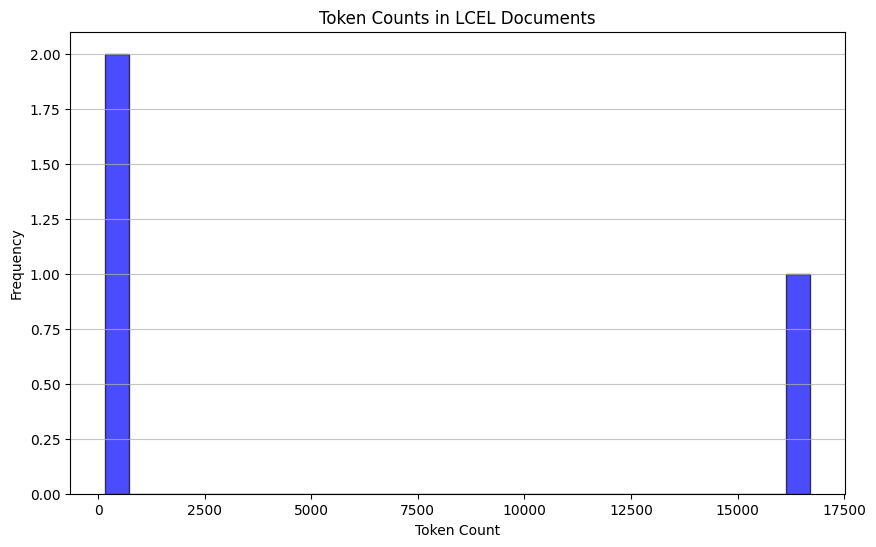

In [ ]:
from langchain_community.document_loaders.recursive_url_loader import RecursiveUrlLoader
from bs4 import BeautifulSoup as Soup
import tiktoken
import matplotlib.pyplot as plt


def num_tokens_from_string(string: str, encoding_name: str) -> int:
    # 주어진 문자열에서 토큰의 개수를 반환합니다.
    encoding = tiktoken.get_encoding(encoding_name)
    num_tokens = len(encoding.encode(string))
    return num_tokens


# LCEL 문서 로드
url = "https://python.langchain.com/docs/expression_language/"
loader = RecursiveUrlLoader(
    url=url, max_depth=20, extractor=lambda x: Soup(x, "html.parser").text
)
docs = loader.load()

# PydanticOutputParser를 사용한 LCEL 문서 로드 (기본 LCEL 문서 외부)
url = "https://python.langchain.com/docs/modules/model_io/output_parsers/quick_start"
loader = RecursiveUrlLoader(
    url=url, max_depth=1, extractor=lambda x: Soup(x, "html.parser").text
)
docs_pydantic = loader.load()

# Self Query를 사용한 LCEL 문서 로드 (기본 LCEL 문서 외부)
url = "https://python.langchain.com/docs/modules/data_connection/retrievers/self_query/"
loader = RecursiveUrlLoader(
    url=url, max_depth=1, extractor=lambda x: Soup(x, "html.parser").text
)
docs_sq = loader.load()

# 문서 텍스트
docs.extend([*docs_pydantic, *docs_sq])
docs_texts = [d.page_content for d in docs]

# 각 문서에 대한 토큰 수 계산
counts = [num_tokens_from_string(d, "cl100k_base") for d in docs_texts]

# 토큰 수의 히스토그램을 그립니다.
plt.figure(figsize=(10, 6))
plt.hist(counts, bins=30, color="blue", edgecolor="black", alpha=0.7)
plt.title("Token Counts in LCEL Documents")
plt.xlabel("Token Count")
plt.ylabel("Frequency")
plt.grid(axis="y", alpha=0.75)

# 히스토그램을 표시합니다.
plt.show()

문서 텍스트를 정렬하고 연결하여 토큰 수를 계산하는 과정을 설명합니다.
- `문서(docs)`를 메타데이터의 `"source"` 키를 기준으로 정렬합니다.
정렬된 문서 리스트를 역순으로 뒤집습니다.
- 역순으로 된 문서의 내용을 특정 구분자`("\n\n\n --- \n\n\n")`를 사용하여 연결합니다.
- 연결된 내용의 토큰 수를 `num_tokens_from_string` 함수를 사용하여 계산하고, 이를 출력합니다. 이때, `"cl100k_base"` 모델을 사용합니다.

In [ ]:
# 문서 텍스트를 연결합니다.
# 문서를 출처 메타데이터 기준으로 정렬합니다.
d_sorted = sorted(docs, key=lambda x: x.metadata["source"])
d_reversed = list(reversed(d_sorted))  # 정렬된 문서를 역순으로 배열합니다.
concatenated_content = "\n\n\n --- \n\n\n".join(
    [
        # 역순으로 배열된 문서의 내용을 연결합니다.
        doc.page_content
        for doc in d_reversed
    ]
)
print(
    "Num tokens in all context: %s"  # 모든 문맥에서의 토큰 수를 출력합니다.
    % num_tokens_from_string(concatenated_content, "cl100k_base")
)

Num tokens in all context: 17034


`RecursiveCharacterTextSplitter`를 사용하여 텍스트를 분할하는 과정을 설명합니다.
- `chunk_size_tok` 변수를 설정하여, 각 텍스트 청크의 크기를 2000 토큰으로 지정합니다.
- `RecursiveCharacterTextSplitter`의 `from_tiktoken_encoder` 메소드를 사용하여 텍스트 분할기를 초기화합니다. 여기서 청크 크기(`chunk_size`)와 청크 간 겹침(`chunk_overlap`)을 0으로 설정합니다.
- 초기화된 텍스트 분할기의 `split_text` 메소드를 호출하여, `concatenated_content`라는 변수에 저장된 연결된 텍스트를 분할합니다. 분할 결과는 `texts_split` 변수에 저장됩니다.


In [ ]:
# 텍스트 분할을 위한 코드
from langchain_text_splitters import RecursiveCharacterTextSplitter

chunk_size_tok = 2000  # 토큰의 청크 크기를 설정합니다.
# 재귀적 문자 텍스트 분할기를 초기화합니다. 토큰 인코더를 사용하여 청크 크기와 중복을 설정합니다.
text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(
    chunk_size=chunk_size_tok, chunk_overlap=0
)
texts_split = text_splitter.split_text(
    concatenated_content
)  # 주어진 텍스트를 분할합니다.

## 모델

- Cache Embedding 을 사용합니다.

In [ ]:
from langchain_openai import OpenAIEmbeddings
from langchain.embeddings import CacheBackedEmbeddings
from langchain.storage import LocalFileStore

store = LocalFileStore("./cache/")

# embeddings 인스턴스를 생성합니다.
embd = OpenAIEmbeddings(model="text-embedding-3-small", disallowed_special=())

cached_embeddings = CacheBackedEmbeddings.from_bytes_store(
    embd, store, namespace=embd.model
)

- 모델을 초기화 합니다.

In [ ]:
!pip install langchain_anthropic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 891.9/891.9 kB 14.0 MB/s eta 0:00:00


In [ ]:
from langchain_anthropic import ChatAnthropic
from langchain_openai import OpenAIEmbeddings, ChatOpenAI
from langchain.callbacks.base import BaseCallbackHandler


class StreamCallback(BaseCallbackHandler):
    def on_llm_new_token(self, token: str, **kwargs):
        print(token, end="", flush=True)


# ChatOpenAI 모델을 초기화합니다. 모델은 "gpt-4-turbo-preview"를 사용합니다.
model = ChatOpenAI(
    model="gpt-4-turbo-preview",
    temperature=0,
    streaming=True,
    callbacks=[StreamCallback()],
)

# ChatAnthropic 모델을 초기화합니다. 온도는 0으로 설정하고, 모델은 "claude-3-opus-20240229"를 사용합니다.
# model = ChatAnthropic(temperature=0, model="claude-3-opus-20240229")


## 트리 구축
- GMM (가우시안 혼합 모델)
  - 다양한 클러스터에 걸쳐 데이터 포인트의 분포를 모델링합니다.
  - 모델의 베이지안 정보 기준(BIC)을 평가하여 최적의 클러스터 수를 결정합니다.
- UMAP (Uniform Manifold Approximation and Projection)
  - 클러스터링을 지원합니다.
  - 고차원 데이터의 차원을 축소합니다.
  - UMAP은 데이터 포인트의 유사성에 기반하여 자연스러운 그룹화를 강조하는 데 도움을 줍니다.
- 지역 및 전역 클러스터링
  - 다양한 규모에서 데이터를 분석하는 데 사용됩니다.
  - 데이터 내의 세밀한 패턴과 더 넓은 패턴 모두를 효과적으로 포착합니다.
- 임계값 설정
  - GMM의 맥락에서 클러스터 멤버십을 결정하기 위해 적용됩니다.
  - 확률 분포를 기반으로 합니다(데이터 포인트를 ≥ 1 클러스터에 할당).

`global_cluster_embeddings` 함수는 임베딩의 글로벌 차원 축소를 수행하기 위해 UMAP을 사용합니다.
- 입력된 임베딩(`embeddings`)을 UMAP을 사용하여 지정된 차원(`dim`)으로 차원 축소합니다.
- `n_neighbors`는 각 포인트를 고려할 이웃의 수를 지정하며, 제공되지 않을 경우 임베딩 수의 제곱근으로 기본 설정됩니다.
- `metric`은 UMAP에 사용될 거리 측정 기준을 지정합니다.
- 결과로, 지정된 차원으로 축소된 임베딩이 numpy 배열로 반환됩니다.

In [ ]:
!pip install umap

  Preparing metadata (setup.py) ... done
  Created wheel for umap: filename=umap-0.1.1-py3-none-any.whl size=3542 sha256=9df95a35921c2cfb2b93397dcf93aedbca413dad1d2e1f7f07c48b14b59dae88
  Stored in directory: /root/.cache/pip/wheels/15/f1/28/53dcf7a309118ed35d810a5f9cb995217800f3f269ab5771cb
Successfully built umap


In [ ]:
from typing import Dict, List, Optional, Tuple

import numpy as np
import pandas as pd
import umap
from langchain.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
from sklearn.mixture import GaussianMixture

RANDOM_SEED = 42  # 재현성을 위한 고정된 시드 값

### --- 위의 인용된 코드에서 주석과 문서화를 추가함 --- ###


def global_cluster_embeddings(
    embeddings: np.ndarray,
    dim: int,
    n_neighbors: Optional[int] = None,
    metric: str = "cosine",
) -> np.ndarray:
    """
    UMAP을 사용하여 임베딩의 전역 차원 축소를 수행합니다.

    매개변수:
    - embeddings: numpy 배열로 된 입력 임베딩.
    - dim: 축소된 공간의 목표 차원.
    - n_neighbors: 선택 사항; 각 점을 고려할 이웃의 수.
                   제공되지 않으면 임베딩 수의 제곱근으로 기본 설정됩니다.
    - metric: UMAP에 사용할 거리 측정 기준.

    반환값:
    - 지정된 차원으로 축소된 임베딩의 numpy 배열.
    """
    if n_neighbors is None:
        n_neighbors = int((len(embeddings) - 1) ** 0.5)
    return umap.UMAP(
        n_neighbors=n_neighbors, n_components=dim, metric=metric
    ).fit_transform(embeddings)


임베딩 데이터에 대해 지역 차원 축소를 수행하는 함수 `local_cluster_embeddings`를 구현합니다.
- 입력된 임베딩(`embeddings`)을 UMAP을 사용하여 지정된 차원(`dim`)으로 차원 축소합니다.
- 차원 축소 과정에서 각 점에 대해 고려할 이웃의 수(`num_neighbors`)와 거리 측정 메트릭(`metric`)을 파라미터로 사용합니다.
- 최종적으로 차원이 축소된 임베딩을 `numpy` 배열로 반환합니다.

In [ ]:
def local_cluster_embeddings(
    embeddings: np.ndarray, dim: int, num_neighbors: int = 10, metric: str = "cosine"
) -> np.ndarray:
    """
    임베딩에 대해 지역 차원 축소를 수행합니다. 이는 일반적으로 전역 클러스터링 이후에 사용됩니다.

    매개변수:
    - embeddings: numpy 배열로서의 입력 임베딩.
    - dim: 축소된 공간의 목표 차원 수.
    - num_neighbors: 각 점에 대해 고려할 이웃의 수.
    - metric: UMAP에 사용할 거리 측정 기준.

    반환값:
    - 지정된 차원으로 축소된 임베딩의 numpy 배열.
    """
    return umap.UMAP(
        n_neighbors=num_neighbors, n_components=dim, metric=metric
    ).fit_transform(embeddings)


`get_optimal_clusters` 함수는 주어진 임베딩 데이터를 기반으로 최적의 클러스터 수를 결정하는 데 사용됩니다. 이 과정은 가우시안 혼합 모델(Gaussian Mixture Model)을 사용하여 베이지안 정보 기준(Bayesian Information Criterion, BIC)을 계산함으로써 수행됩니다.
- 입력 임베딩(`embeddings`)은 numpy 배열로 제공됩니다.
- 최대 클러스터 수(`max_clusters`)는 고려할 클러스터의 최대 수를 지정합니다. 기본값은 50입니다.
- 재현성을 위한 난수 상태(`random_state`)는 고정된 값을 사용합니다.
- 함수는 입력 임베딩에 대해 여러 클러스터 수를 시도하며 각각에 대한 BIC 값을 계산합니다.
- 최소 BIC 값을 가지는 클러스터 수를 최적의 클러스터 수로 결정하고 반환합니다.

이 함수는 클러스터링 문제에서 데이터를 가장 잘 설명하는 클러스터 수를 자동으로 찾는 데 유용하게 사용될 수 있습니다.

In [ ]:
def get_optimal_clusters(
    embeddings: np.ndarray, max_clusters: int = 50, random_state: int = RANDOM_SEED
) -> int:
    """
    가우시안 혼합 모델(Gaussian Mixture Model)을 사용하여 베이지안 정보 기준(BIC)을 통해 최적의 클러스터 수를 결정합니다.

    매개변수:
    - embeddings: numpy 배열로서의 입력 임베딩.
    - max_clusters: 고려할 최대 클러스터 수.
    - random_state: 재현성을 위한 시드.

    반환값:
    - 발견된 최적의 클러스터 수를 나타내는 정수.
    """
    max_clusters = min(
        max_clusters, len(embeddings)
    )  # 최대 클러스터 수와 임베딩의 길이 중 작은 값을 최대 클러스터 수로 설정
    n_clusters = np.arange(1, max_clusters)  # 1부터 최대 클러스터 수까지의 범위를 생성
    bics = []  # BIC 점수를 저장할 리스트
    for n in n_clusters:  # 각 클러스터 수에 대해 반복
        gm = GaussianMixture(
            n_components=n, random_state=random_state
        )  # 가우시안 혼합 모델 초기화
        gm.fit(embeddings)  # 임베딩에 대해 모델 학습
        bics.append(gm.bic(embeddings))  # 학습된 모델의 BIC 점수를 리스트에 추가
    return n_clusters[np.argmin(bics)]  # BIC 점수가 가장 낮은 클러스터 수를 반환


`GMM_cluster` 함수는 임베딩을 가우시안 혼합 모델(Gaussian Mixture Model, GMM)을 사용하여 클러스터링합니다. 이 과정은 확률 임계값을 기반으로 합니다.
- 입력된 임베딩(`embeddings`)은 numpy 배열로 제공됩니다.
- `threshold`는 임베딩을 특정 클러스터에 할당하기 위한 확률 임계값입니다.
- `random_state`는 결과의 재현성을 위한 시드 값입니다.
- 최적의 클러스터 수를 결정하기 위해 `get_optimal_clusters` 함수를 호출합니다.
- 결정된 클러스터 수를 바탕으로 가우시안 혼합 모델을 초기화하고, 입력된 임베딩에 대해 학습을 수행합니다.
- 각 임베딩에 대한 클러스터 할당 확률을 계산하고, 이 확률이 주어진 임계값을 초과하는 경우 해당 임베딩을 클러스터에 할당합니다.
- 함수는 최종적으로 임베딩의 클러스터 레이블과 결정된 클러스터 수를 튜플로 반환합니다.

In [ ]:
def GMM_cluster(embeddings: np.ndarray, threshold: float, random_state: int = 0):
    """
    확률 임계값을 기반으로 가우시안 혼합 모델(GMM)을 사용하여 임베딩을 클러스터링합니다.

    매개변수:
    - embeddings: numpy 배열로서의 입력 임베딩.
    - threshold: 임베딩을 클러스터에 할당하기 위한 확률 임계값.
    - random_state: 재현성을 위한 시드.

    반환값:
    - 클러스터 레이블과 결정된 클러스터 수를 포함하는 튜플.
    """
    n_clusters = get_optimal_clusters(embeddings)  # 최적의 클러스터 수를 구합니다.
    # 가우시안 혼합 모델을 초기화합니다.
    gm = GaussianMixture(n_components=n_clusters, random_state=random_state)
    gm.fit(embeddings)  # 임베딩에 대해 모델을 학습합니다.
    probs = gm.predict_proba(
        embeddings
    )  # 임베딩이 각 클러스터에 속할 확률을 예측합니다.
    # 임계값을 초과하는 확률을 가진 클러스터를 레이블로 선택합니다.
    labels = [np.where(prob > threshold)[0] for prob in probs]
    return labels, n_clusters  # 레이블과 클러스터 수를 반환합니다.


`perform_clustering` 함수는 임베딩에 대해 차원 축소, 가우시안 혼합 모델을 사용한 글로벌 클러스터링, 그리고 각 글로벌 클러스터 내에서의 로컬 클러스터링을 수행하여 클러스터링 결과를 반환합니다.
- 입력된 임베딩(`embeddings`)에 대해 차원 축소를 수행합니다. 이는 UMAP을 사용하여 지정된 차원(`dim`)으로 임베딩의 차원을 축소하는 과정을 포함합니다.
- 차원이 축소된 임베딩에 대해 가우시안 혼합 모델(GMM)을 사용하여 글로벌 클러스터링을 수행합니다. 클러스터 할당은 주어진 확률 임계값(`threshold`)을 기준으로 결정됩니다.
- 각 글로벌 클러스터 내에서 추가적인 로컬 클러스터링을 수행합니다. 이 과정은 글로벌 클러스터링 결과를 바탕으로 각 글로벌 클러스터에 속한 임베딩들만을 대상으로 다시 차원 축소 및 GMM 클러스터링을 진행합니다.
- 최종적으로, 모든 임베딩에 대해 글로벌 및 로컬 클러스터 ID를 할당하여, 각 임베딩이 속한 클러스터 ID를 담은 리스트를 반환합니다. 이 리스트는 임베딩의 순서에 따라 각 임베딩에 대한 클러스터 ID 배열을 포함합니다.

이 함수는 고차원 데이터의 클러스터링을 위해 글로벌 및 로컬 차원에서의 클러스터링을 결합한 접근 방식을 제공합니다. 이를 통해 더 세분화된 클러스터링 결과를 얻을 수 있으며, 복잡한 데이터 구조를 보다 효과적으로 분석할 수 있습니다.

In [ ]:
def perform_clustering(
    embeddings: np.ndarray,
    dim: int,
    threshold: float,
) -> List[np.ndarray]:
    """
    임베딩에 대해 차원 축소, 가우시안 혼합 모델을 사용한 클러스터링, 각 글로벌 클러스터 내에서의 로컬 클러스터링을 순서대로 수행합니다.

    매개변수:
    - embeddings: numpy 배열로 된 입력 임베딩입니다.
    - dim: UMAP 축소를 위한 목표 차원입니다.
    - threshold: GMM에서 임베딩을 클러스터에 할당하기 위한 확률 임계값입니다.

    반환값:
    - 각 임베딩의 클러스터 ID를 포함하는 numpy 배열의 리스트입니다.
    """
    if len(embeddings) <= dim + 1:
        # 데이터가 충분하지 않을 때 클러스터링을 피합니다.
        return [np.array([0]) for _ in range(len(embeddings))]

    # 글로벌 차원 축소
    reduced_embeddings_global = global_cluster_embeddings(embeddings, dim)
    # 글로벌 클러스터링
    global_clusters, n_global_clusters = GMM_cluster(
        reduced_embeddings_global, threshold
    )

    all_local_clusters = [np.array([]) for _ in range(len(embeddings))]
    total_clusters = 0

    # 각 글로벌 클러스터를 순회하며 로컬 클러스터링 수행
    for i in range(n_global_clusters):
        # 현재 글로벌 클러스터에 속하는 임베딩 추출
        global_cluster_embeddings_ = embeddings[
            np.array([i in gc for gc in global_clusters])
        ]

        if len(global_cluster_embeddings_) == 0:
            continue
        if len(global_cluster_embeddings_) <= dim + 1:
            # 작은 클러스터는 직접 할당으로 처리
            local_clusters = [np.array([0]) for _ in global_cluster_embeddings_]
            n_local_clusters = 1
        else:
            # 로컬 차원 축소 및 클러스터링
            reduced_embeddings_local = local_cluster_embeddings(
                global_cluster_embeddings_, dim
            )
            local_clusters, n_local_clusters = GMM_cluster(
                reduced_embeddings_local, threshold
            )

        # 로컬 클러스터 ID 할당, 이미 처리된 총 클러스터 수를 조정
        for j in range(n_local_clusters):
            local_cluster_embeddings_ = global_cluster_embeddings_[
                np.array([j in lc for lc in local_clusters])
            ]
            indices = np.where(
                (embeddings == local_cluster_embeddings_[:, None]).all(-1)
            )[1]
            for idx in indices:
                all_local_clusters[idx] = np.append(
                    all_local_clusters[idx], j + total_clusters
                )

        total_clusters += n_local_clusters

    return all_local_clusters


텍스트 문서의 목록에 대한 임베딩을 생성하는 함수 `embed`를 구현합니다.
- 입력으로 텍스트 문서의 목록(`texts`)을 받습니다.
- `embd` 객체의 `embed_documents` 메소드를 사용하여 텍스트 문서의 임베딩을 생성합니다.
- 생성된 임베딩을 `numpy.ndarray` 형태로 변환하여 반환합니다.

In [ ]:
def embed(texts):
    # 텍스트 문서 목록에 대한 임베딩을 생성합니다.
    #
    # 이 함수는 `embd` 객체가 존재한다고 가정하며, 이 객체는 텍스트 목록을 받아 그 임베딩을 반환하는 `embed_documents` 메소드를 가지고 있습니다.
    #
    # 매개변수:
    # - texts: List[str], 임베딩할 텍스트 문서의 목록입니다.
    #
    # 반환값:
    # - numpy.ndarray: 주어진 텍스트 문서들에 대한 임베딩 배열입니다.
    text_embeddings = embd.embed_documents(
        texts
    )  # 텍스트 문서들의 임베딩을 생성합니다.
    text_embeddings_np = np.array(text_embeddings)  # 임베딩을 numpy 배열로 변환합니다.
    return text_embeddings_np  # 임베딩된 numpy 배열을 반환합니다.


`embed_cluster_texts` 함수는 텍스트 목록을 임베딩하고 클러스터링하여, 원본 텍스트, 해당 임베딩, 그리고 할당된 클러스터 라벨을 포함하는 `pandas.DataFrame`을 반환합니다.
- 주어진 텍스트 목록에 대해 임베딩을 생성합니다.
- 생성된 임베딩을 기반으로 클러스터링을 수행합니다. 이 과정은 사전에 정의된 `perform_clustering` 함수를 사용합니다.
- 결과를 저장하기 위해 `pandas.DataFrame`을 초기화합니다.
- DataFrame에 원본 텍스트, 임베딩 리스트, 클러스터 라벨을 각각 저장합니다.

이 함수는 텍스트 데이터의 임베딩 생성과 클러스터링을 하나의 단계로 결합하여, 텍스트 데이터의 구조적 분석과 그룹화를 용이하게 합니다.

In [ ]:
def embed_cluster_texts(texts):
    """
    텍스트 목록을 임베딩하고 클러스터링하여, 텍스트, 그들의 임베딩, 그리고 클러스터 라벨이 포함된 DataFrame을 반환합니다.

    이 함수는 임베딩 생성과 클러스터링을 단일 단계로 결합합니다. 임베딩에 대해 클러스터링을 수행하는 `perform_clustering` 함수의 사전 정의된 존재를 가정합니다.

    매개변수:
    - texts: List[str], 처리될 텍스트 문서의 목록입니다.

    반환값:
    - pandas.DataFrame: 원본 텍스트, 그들의 임베딩, 그리고 할당된 클러스터 라벨이 포함된 DataFrame입니다.
    """
    text_embeddings_np = embed(texts)  # 임베딩 생성
    cluster_labels = perform_clustering(
        text_embeddings_np, 10, 0.1
    )  # 임베딩에 대해 클러스터링 수행
    df = pd.DataFrame()  # 결과를 저장할 DataFrame 초기화
    df["text"] = texts  # 원본 텍스트 저장
    df["embd"] = list(text_embeddings_np)  # DataFrame에 리스트로 임베딩 저장
    df["cluster"] = cluster_labels  # 클러스터 라벨 저장
    return df


`fmt_txt` 함수는 `pandas`의 `DataFrame`에서 텍스트 문서를 단일 문자열로 포맷팅합니다.
- 입력 파라미터로 `DataFrame`을 받으며, 이 `DataFrame`은 포맷팅할 텍스트 문서를 포함한 'text' 컬럼을 가져야 합니다.
- 모든 텍스트 문서는 특정 구분자`("--- --- \n --- ---")`를 사용하여 연결되어 단일 문자열로 반환됩니다.
- 함수는 연결된 텍스트 문서를 포함하는 단일 문자열을 반환합니다.

In [ ]:
def fmt_txt(df: pd.DataFrame) -> str:
    """
    DataFrame에 있는 텍스트 문서를 단일 문자열로 포맷합니다.

    매개변수:
    - df: 'text' 열에 포맷할 텍스트 문서가 포함된 DataFrame.

    반환값:
    - 모든 텍스트 문서가 특정 구분자로 결합된 단일 문자열.
    """
    unique_txt = df["text"].tolist()  # 'text' 열의 모든 텍스트를 리스트로 변환
    return "--- --- \n --- --- ".join(
        unique_txt
    )  # 텍스트 문서들을 특정 구분자로 결합하여 반환


텍스트 데이터를 임베딩하고, 클러스터링하며, 각 클러스터에 대한 요약을 생성하는 과정을 수행합니다.
- 주어진 텍스트 목록에 대해 임베딩을 생성하고 유사성에 기반한 클러스터링을 진행합니다. 이 과정은 `df_clusters` 데이터프레임을 결과로 합니다. 이 데이터프레임에는 원본 텍스트, 임베딩, 그리고 클러스터 할당 정보가 포함됩니다.
- 클러스터 할당을 쉽게 처리하기 위해 데이터프레임 항목을 확장합니다. 각 행은 텍스트, 임베딩, 클러스터를 포함하는 새로운 데이터프레임으로 변환됩니다.
- 확장된 데이터프레임에서 고유한 클러스터 식별자를 추출하고, 각 클러스터에 대한 텍스트를 포맷팅하여 요약을 생성합니다. 이 요약은 `df_summary` 데이터프레임에 저장됩니다. 이 데이터프레임은 각 클러스터의 요약, 지정된 세부 수준, 그리고 클러스터 식별자를 포함합니다.
- 최종적으로, 함수는 두 개의 데이터프레임을 포함하는 튜플을 반환합니다. 첫 번째 데이터프레임은 원본 텍스트, 임베딩, 클러스터 할당 정보를 포함하며, 두 번째 데이터프레임은 각 클러스터에 대한 요약과 해당 세부 수준, 클러스터 식별자를 포함합니다.

In [ ]:
def embed_cluster_summarize_texts(
    texts: List[str], level: int
) -> Tuple[pd.DataFrame, pd.DataFrame]:
    """
    텍스트 목록에 대해 임베딩, 클러스터링 및 요약을 수행합니다. 이 함수는 먼저 텍스트에 대한 임베딩을 생성하고,
    유사성을 기반으로 클러스터링을 수행한 다음, 클러스터 할당을 확장하여 처리를 용이하게 하고 각 클러스터 내의 내용을 요약합니다.

    매개변수:
    - texts: 처리할 텍스트 문서 목록입니다.
    - level: 처리의 깊이나 세부 사항을 정의할 수 있는 정수 매개변수입니다.

    반환값:
    - 두 개의 데이터프레임을 포함하는 튜플:
      1. 첫 번째 데이터프레임(`df_clusters`)은 원본 텍스트, 그들의 임베딩, 그리고 클러스터 할당을 포함합니다.
      2. 두 번째 데이터프레임(`df_summary`)은 각 클러스터에 대한 요약, 지정된 세부 수준, 그리고 클러스터 식별자를 포함합니다.
    """

    # 텍스트를 임베딩하고 클러스터링하여 'text', 'embd', 'cluster' 열이 있는 데이터프레임을 생성합니다.
    df_clusters = embed_cluster_texts(texts)

    # 클러스터를 쉽게 조작하기 위해 데이터프레임을 확장할 준비를 합니다.
    expanded_list = []

    # 데이터프레임 항목을 문서-클러스터 쌍으로 확장하여 처리를 간단하게 합니다.
    for index, row in df_clusters.iterrows():
        for cluster in row["cluster"]:
            expanded_list.append(
                {"text": row["text"], "embd": row["embd"], "cluster": cluster}
            )

    # 확장된 목록에서 새 데이터프레임을 생성합니다.
    expanded_df = pd.DataFrame(expanded_list)

    # 처리를 위해 고유한 클러스터 식별자를 검색합니다.
    all_clusters = expanded_df["cluster"].unique()

    print(f"--Generated {len(all_clusters)} clusters--")

    # 요약
    template = """여기 LangChain 표현 언어 문서의 하위 집합이 있습니다.

    LangChain 표현 언어는 LangChain에서 체인을 구성하는 방법을 제공합니다.

    제공된 문서의 자세한 요약을 제공하십시오.

    문서:
    {context}
    """
    prompt = ChatPromptTemplate.from_template(template)
    chain = prompt | model | StrOutputParser()

    # 각 클러스터 내의 텍스트를 요약을 위해 포맷팅합니다.
    summaries = []
    for i in all_clusters:
        df_cluster = expanded_df[expanded_df["cluster"] == i]
        formatted_txt = fmt_txt(df_cluster)
        summaries.append(chain.invoke({"context": formatted_txt}))

    # 요약, 해당 클러스터 및 레벨을 저장할 데이터프레임을 생성합니다.
    df_summary = pd.DataFrame(
        {
            "summaries": summaries,
            "level": [level] * len(summaries),
            "cluster": list(all_clusters),
        }
    )

    return df_clusters, df_summary


텍스트 데이터를 재귀적으로 임베딩, 클러스터링 및 요약하는 과정을 구현한 함수입니다.
- 주어진 텍스트 리스트를 임베딩, 클러스터링 및 요약하여 각 단계별로 결과를 저장합니다.
- 함수는 최대 지정된 재귀 레벨까지 실행되거나, 유일한 클러스터의 수가 1이 될 때까지 반복됩니다.
- 각 재귀 단계에서는 현재 레벨의 클러스터링 결과와 요약 결과를 데이터프레임 형태로 반환하고, 이를 결과 딕셔너리에 저장합니다.
- 만약 현재 레벨이 최대 재귀 레벨보다 작고, 유일한 클러스터의 수가 1보다 크다면, 현재 레벨의 요약 결과를 다음 레벨의 입력 텍스트로 사용하여 재귀적으로 함수를 호출합니다.
- 최종적으로 각 레벨별 클러스터 데이터프레임과 요약 데이터프레임을 포함하는 딕셔너리를 반환합니다.

In [ ]:
def recursive_embed_cluster_summarize(
    texts: List[str], level: int = 1, n_levels: int = 3
) -> Dict[int, Tuple[pd.DataFrame, pd.DataFrame]]:
    """
    지정된 레벨까지 또는 고유 클러스터의 수가 1이 될 때까지 텍스트를 재귀적으로 임베딩, 클러스터링, 요약하여
    각 레벨에서의 결과를 저장합니다.

    매개변수:
    - texts: List[str], 처리할 텍스트들.
    - level: int, 현재 재귀 레벨 (1에서 시작).
    - n_levels: int, 재귀의 최대 깊이.

    반환값:
    - Dict[int, Tuple[pd.DataFrame, pd.DataFrame]], 재귀 레벨을 키로 하고 해당 레벨에서의 클러스터 DataFrame과 요약 DataFrame을 포함하는 튜플을 값으로 하는 사전.
    """
    results = {}  # 각 레벨에서의 결과를 저장할 사전

    # 현재 레벨에 대해 임베딩, 클러스터링, 요약 수행
    df_clusters, df_summary = embed_cluster_summarize_texts(texts, level)

    # 현재 레벨의 결과 저장
    results[level] = (df_clusters, df_summary)

    # 추가 재귀가 가능하고 의미가 있는지 결정
    unique_clusters = df_summary["cluster"].nunique()
    if level < n_levels and unique_clusters > 1:
        # 다음 레벨의 재귀 입력 텍스트로 요약 사용
        new_texts = df_summary["summaries"].tolist()
        next_level_results = recursive_embed_cluster_summarize(
            new_texts, level + 1, n_levels
        )

        # 다음 레벨의 결과를 현재 결과 사전에 병합
        results.update(next_level_results)

    return results


In [ ]:
# 전체 문서의 개수
len(docs_texts)

3

In [ ]:
# 트리 구축
leaf_texts = docs_texts  # 문서 텍스트를 리프 텍스트로 설정
results = recursive_embed_cluster_summarize(
    leaf_texts, level=1, n_levels=3
)  # 재귀적으로 임베딩, 클러스터링 및 요약을 수행하여 결과를 얻음

--Generated 1 clusters--
The provided document is a comprehensive guide to LangChain, a framework designed for building applications with Large Language Models (LLMs). It covers various aspects of LangChain, including its architecture, components, and how to use it for creating different types of applications. Here's a detailed summary:

### Architecture and Core Components
- **LangChain Core**: Contains base abstractions for different components and ways to compose them. It defines interfaces for core components like LLMs, vector stores, and retrievers without third-party integrations.
- **LangChain**: The main package includes chains, agents, and retrieval strategies for an application's cognitive architecture, generic across all integrations.
- **LangChain Community**: Contains third-party integrations maintained by the LangChain community, focusing on keeping the package lightweight.
- **Partner Packages**: Popular integrations are split into their own packages (e.g., langchain-ope

## 벡터 저장소

`Chroma` 벡터 저장소를 사용하여 텍스트 데이터의 벡터화 및 검색 가능한 저장소를 구축하는 과정을 설명합니다.
- 초기에 `leaf_texts`에 저장된 텍스트 데이터를 `all_texts` 변수에 복사합니다.
- 결과 데이터(`results`)를 순회하며 각 레벨에서 요약된 텍스트를 추출하고, 이를 `all_texts`에 추가합니다.
- 각 레벨의 DataFrame에서 `summaries` 컬럼의 값을 리스트로 변환하여 추출합니다.
- 추출된 요약문을 `all_texts`에 추가합니다.
- 모든 텍스트 데이터(`all_texts`)를 사용하여 `Chroma` 벡터 저장소를 구축합니다.
- `Chroma.from_texts` 함수를 호출하여 텍스트 데이터를 벡터화하고, 벡터 저장소를 생성합니다.
- 생성된 벡터 저장소를 검색 가능하게 만들기 위해 `.as_retriever()` 메소드를 사용하여 검색기(`retriever`)를 초기화합니다.

이 과정을 통해, 다양한 레벨의 요약문을 포함한 텍스트 데이터를 벡터화하고, 이를 기반으로 검색 가능한 Chroma 벡터 저장소를 구축합니다.

In [ ]:
from langchain_community.vectorstores import FAISS

# leaf_texts를 복사하여 all_texts를 초기화합니다.
all_texts = leaf_texts.copy()

# 각 레벨의 요약을 추출하여 all_texts에 추가하기 위해 결과를 순회합니다.
for level in sorted(results.keys()):
    # 현재 레벨의 DataFrame에서 요약을 추출합니다.
    summaries = results[level][1]["summaries"].tolist()
    # 현재 레벨의 요약을 all_texts에 추가합니다.
    all_texts.extend(summaries)

# 이제 all_texts를 사용하여 FAISS vectorstore를 구축합니다.
vectorstore = FAISS.from_texts(texts=all_texts, embedding=embd)


- DB를 로컬에 저장합니다.

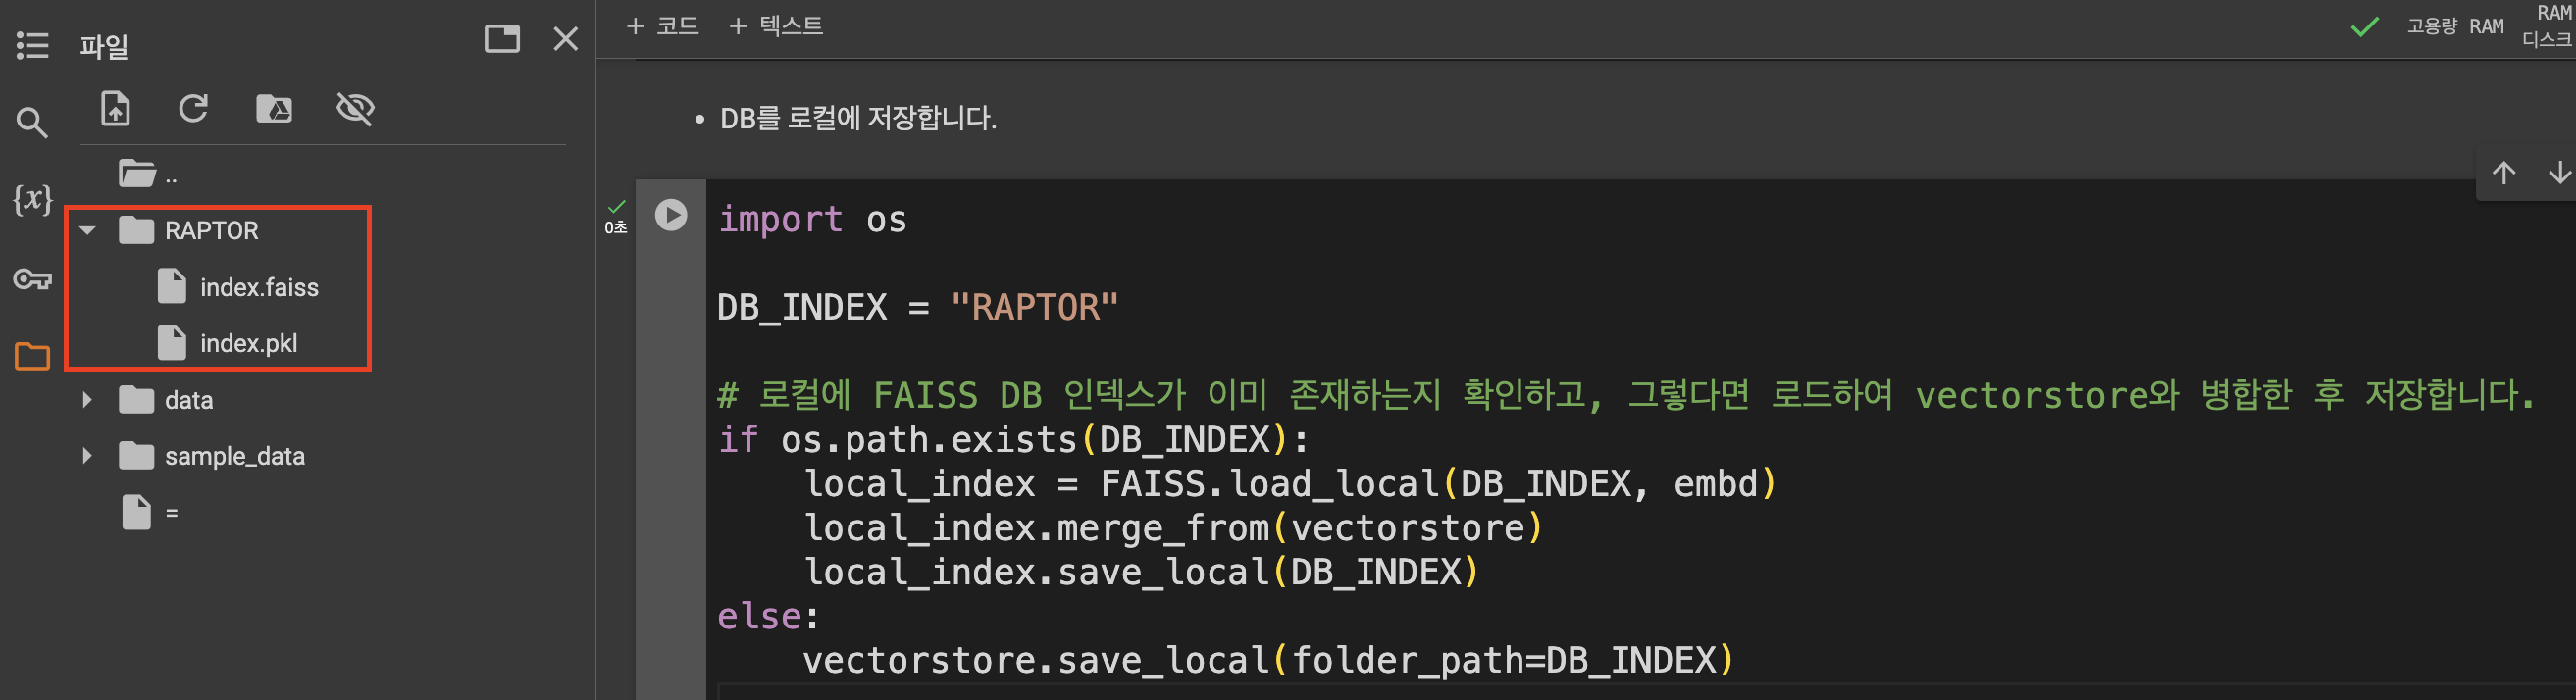

In [ ]:
import os

DB_INDEX = "RAPTOR"

# 로컬에 FAISS DB 인덱스가 이미 존재하는지 확인하고, 그렇다면 로드하여 vectorstore와 병합한 후 저장합니다.
if os.path.exists(DB_INDEX):
    local_index = FAISS.load_local(DB_INDEX, embd)
    local_index.merge_from(vectorstore)
    local_index.save_local(DB_INDEX)
else:
    vectorstore.save_local(folder_path=DB_INDEX)


## retriever 생성

In [ ]:
# retriever 생성
retriever = vectorstore.as_retriever()

## RAG 정의

Retrieval Augmented Generation(RAG) 체인을 정의하고 특정 코드 예제를 요청하는 방법을 구현합니다.
- `hub.pull`을 사용하여 RAG 프롬프트를 불러옵니다.
- 문서 포맷팅을 위한 `format_docs` 함수를 정의합니다. 이 함수는 문서의 페이지 내용을 연결하여 반환합니다.
- RAG 체인을 구성합니다. 이 체인은 검색기(`retriever`)로부터 문맥을 가져오고, `format_docs` 함수로 포맷팅한 후, 질문을 처리합니다.
- `RunnablePassthrough()`를 사용하여 질문을 그대로 전달합니다.
- 체인은 `프롬프트, 모델, 그리고 StrOutputParser()`를 통해 최종 출력을 문자열로 파싱합니다.
- `rag_chain.invoke` 메소드를 사용하여 "How to define a RAG chain? Give me a specific code example."라는 질문을 처리합니다.

In [ ]:
from langchain import hub
from langchain_core.runnables import RunnablePassthrough

# 프롬프트 생성
prompt = hub.pull("rlm/rag-prompt")

# 문서 포스트 프로세싱


def format_docs(docs):
    # 문서의 페이지 내용을 이어붙여 반환합니다.
    return "\n\n".join(doc.page_content for doc in docs)


# RAG 체인 정의
rag_chain = (
    # 검색 결과를 포맷팅하고 질문을 처리합니다.
    {"context": retriever | format_docs, "question": RunnablePassthrough()}
    | prompt  # 프롬프트를 적용합니다.
    | model  # 모델을 적용합니다.
    | StrOutputParser()  # 문자열 출력 파서를 적용합니다.
)

/usr/local/lib/python3.10/dist-packages/langsmith/client.py:322: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


In [ ]:
# 추상적인 질문 실행
rag_chain.invoke("전체 문서의 핵심 주제에 대해 한국어로 설명해주세요.")

제공된 문서는 대규모 언어 모델(LLMs)을 사용하여 다양한 유형의 애플리케이션을 만들기 위한 프레임워크인 LangChain에 대한 종합 가이드입니다. 이 문서는 LangChain의 아키텍처, 구성 요소, 그리고 다양한 유형의 애플리케이션을 만드는 방법 등 LangChain의 여러 측면을 다룹니다. LangChain은 기본 추상화, 컴포넌트 인터페이스, 에이전트 생성, 콜백 시스템 및 기술 등을 포함하여 LLM 애플리케이션 개발의 유연성, 확장성, 견고함을 강조합니다.

'제공된 문서는 대규모 언어 모델(LLMs)을 사용하여 다양한 유형의 애플리케이션을 만들기 위한 프레임워크인 LangChain에 대한 종합 가이드입니다. 이 문서는 LangChain의 아키텍처, 구성 요소, 그리고 다양한 유형의 애플리케이션을 만드는 방법 등 LangChain의 여러 측면을 다룹니다. LangChain은 기본 추상화, 컴포넌트 인터페이스, 에이전트 생성, 콜백 시스템 및 기술 등을 포함하여 LLM 애플리케이션 개발의 유연성, 확장성, 견고함을 강조합니다.'

# [대화내용을 기억하는 RAG 체인](https://wikidocs.net/252858)

## 1.일반 Chain에 대화기록만 추가

In [ ]:
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_community.chat_message_histories import ChatMessageHistory
from langchain_core.chat_history import BaseChatMessageHistory
from langchain_core.runnables.history import RunnableWithMessageHistory
from langchain_openai import ChatOpenAI
from langchain_core.output_parsers import StrOutputParser


# 프롬프트 정의
prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "당신은 Question-Answering 챗봇입니다. 주어진 질문에 대한 답변을 제공해주세요.",
        ),
        # 대화기록용 key 인 chat_history 는 가급적 변경 없이 사용하세요!
        MessagesPlaceholder(variable_name="chat_history"),
        ("human", "#Question:\n{question}"),  # 사용자 입력을 변수로 사용
    ]
)

# llm 생성
llm = ChatOpenAI()

# 일반 Chain 생성
chain = prompt | llm | StrOutputParser()

- 대화를 기록하는 체인 생성(chain_with_history)

In [ ]:
# 세션 기록을 저장할 딕셔너리
store = {}


# 세션 ID를 기반으로 세션 기록을 가져오는 함수
def get_session_history(session_ids):
    print(f"[대화 세션ID]: {session_ids}")
    if session_ids not in store:  # 세션 ID가 store에 없는 경우
        # 새로운 ChatMessageHistory 객체를 생성하여 store에 저장
        store[session_ids] = ChatMessageHistory()
    return store[session_ids]  # 해당 세션 ID에 대한 세션 기록 반환


chain_with_history = RunnableWithMessageHistory(
    chain,
    get_session_history,  # 세션 기록을 가져오는 함수
    input_messages_key="question",  # 사용자의 질문이 템플릿 변수에 들어갈 key
    history_messages_key="chat_history",  # 기록 메시지의 키
)

- 첫 번째 질문 실행

In [ ]:
chain_with_history.invoke(
    # 질문 입력
    {"question": "나의 이름은 홍길동입니다."},
    # 세션 ID 기준으로 대화를 기록합니다.
    config={"configurable": {"session_id": "abc123"}},
)


[대화 세션ID]: abc123


'안녕하세요, 홍길동님! 만나서 반가워요. 무엇을 도와드릴까요?'

- 이어서 질문 실행

In [ ]:
chain_with_history.invoke(
    # 질문 입력
    {"question": "내 이름이 뭐라고?"},
    # 세션 ID 기준으로 대화를 기록합니다.
    config={"configurable": {"session_id": "abc123"}},
)

[대화 세션ID]: abc123


'당신의 이름은 홍길동이라고 하셨어요. 어떤 도움이 필요하신가요?'

## 2.RAG + RunnableWithMessageHistory
- 먼저 일반 RAG Chain 을 생성합니다. 단, 6단계의 prompt 에 `{chat_history}` 를 꼭 추가합니다.

In [ ]:
DATA_PATH

'/content/data/MyDrive/ai_lecture/3. Large Language Models/data/'

In [ ]:
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import PDFPlumberLoader
from langchain_community.vectorstores import FAISS
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import PromptTemplate
from langchain_openai import ChatOpenAI, OpenAIEmbeddings
from langchain_community.chat_message_histories import ChatMessageHistory
from langchain_core.runnables.history import RunnableWithMessageHistory
from langchain_openai import ChatOpenAI
from langchain_core.output_parsers import StrOutputParser
from operator import itemgetter

# 단계 1: 문서 로드(Load Documents)
loader = PDFPlumberLoader(DATA_PATH+"SPRI_AI_Brief_2023년12월호_F.pdf")
docs = loader.load()

# 단계 2: 문서 분할(Split Documents)
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=50)
split_documents = text_splitter.split_documents(docs)

# 단계 3: 임베딩(Embedding) 생성
embeddings = OpenAIEmbeddings()

# 단계 4: DB 생성(Create DB) 및 저장
# 벡터스토어를 생성합니다.
vectorstore = FAISS.from_documents(documents=split_documents, embedding=embeddings)

# 단계 5: 검색기(Retriever) 생성
# 문서에 포함되어 있는 정보를 검색하고 생성합니다.
retriever = vectorstore.as_retriever()

# 단계 6: 프롬프트 생성(Create Prompt)
# 프롬프트를 생성합니다.
prompt = PromptTemplate.from_template(
    """You are an assistant for question-answering tasks.
Use the following pieces of retrieved context to answer the question.
If you don't know the answer, just say that you don't know.
Answer in Korean.

#Previous Chat History:
{chat_history}

#Question:
{question}

#Context:
{context}

#Answer:"""
)

# 단계 7: 언어모델(LLM) 생성
# 모델(LLM) 을 생성합니다.
llm = ChatOpenAI(model_name="gpt-4o", temperature=0)

# 단계 8: 체인(Chain) 생성
chain = (
    {
        "context": itemgetter("question") | retriever,
        "question": itemgetter("question"),
        "chat_history": itemgetter("chat_history"),
    }
    | prompt
    | llm
    | StrOutputParser()
)


- 대화를 저장할 함수 정의

In [ ]:
# 세션 기록을 저장할 딕셔너리
store = {}


# 세션 ID를 기반으로 세션 기록을 가져오는 함수
def get_session_history(session_ids):
    print(f"[대화 세션ID]: {session_ids}")
    if session_ids not in store:  # 세션 ID가 store에 없는 경우
        # 새로운 ChatMessageHistory 객체를 생성하여 store에 저장
        store[session_ids] = ChatMessageHistory()
    return store[session_ids]  # 해당 세션 ID에 대한 세션 기록 반환


# 대화를 기록하는 RAG 체인 생성
rag_with_history = RunnableWithMessageHistory(
    chain,
    get_session_history,  # 세션 기록을 가져오는 함수
    input_messages_key="question",  # 사용자의 질문이 템플릿 변수에 들어갈 key
    history_messages_key="chat_history",  # 기록 메시지의 키
)


- 첫 번째 질문 실행

In [ ]:
rag_with_history.invoke(
    # 질문 입력
    {"question": "삼성전자가 만든 생성형 AI 이름은?"},
    # 세션 ID 기준으로 대화를 기록합니다.
    config={"configurable": {"session_id": "rag123"}},
)


[대화 세션ID]: rag123


"삼성전자가 만든 생성형 AI의 이름은 '삼성 가우스'입니다."

- 이어진 질문 실행

In [ ]:
rag_with_history.invoke(
    # 질문 입력
    {"question": "이전 답변을 영어로 번역해주세요."},
    # 세션 ID 기준으로 대화를 기록합니다.
    config={"configurable": {"session_id": "rag123"}},
)


[대화 세션ID]: rag123


'The name of the generative AI created by Samsung Electronics is "Samsung Gauss."'